<a href="https://colab.research.google.com/github/Aloma597/Python_project/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = '/content/drive/MyDrive/breast-cancer-wisconsin.data'


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Load the data into a Pandas DataFrame
df = pd.read_csv('breast-cancer-wisconsin.data')


In [ ]:
df_cancer = df.rename(columns = {'1000025': 'Sample code number ','5':'Clump Thickness','1':'Uniformity of Cell Size ','1.1':'Uniformity of Cell Shape','1.2':'Marginal Adhesion','2':'Single Epithelial Cell Size','1.3':'Bare Nuclei','3':'Bland Chromatin','1.4':'Normal Nucleoli','1.5':'Mitoses','2.1':'Class'})

In [ ]:
df_cancer

Sample code number   Clump Thickness  Uniformity of Cell Size   \
0                1002945                5                         4   
1                1015425                3                         1   
2                1016277                6                         8   
3                1017023                4                         1   
4                1017122                8                        10   
..                   ...              ...                       ...   
693               776715                3                         1   
694               841769                2                         1   
695               888820                5                        10   
696               897471                4                         8   
697               897471                4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            10                3                2        1      2  
1             2                3                1        1      2  
2             4                3                7        1      2  
3             1                3                1        1      2  
4            10                9                7        1      4  
..          ...              ...              ...      ...    ...  
693           2                1                1        1      2  
694           1                1                1        1      2  
695           3                8               10        2      4  
696           4               10                6        1      4  
697           5               10                4        1      4  

[698 rows x 11 columns]

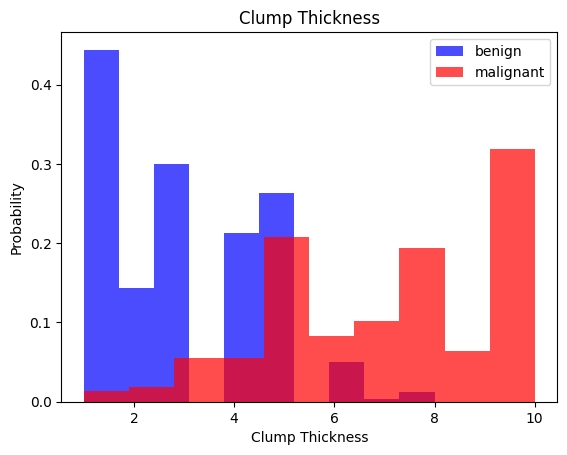

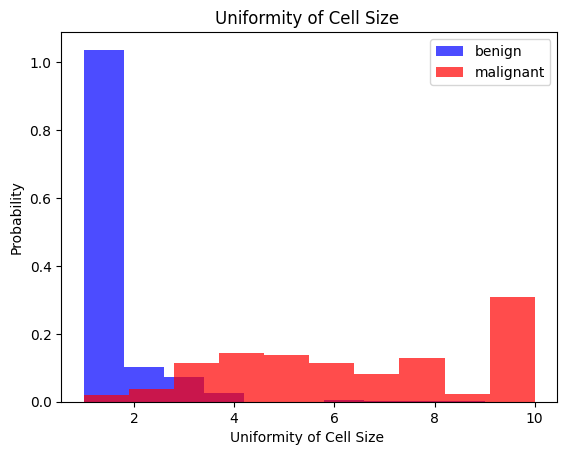

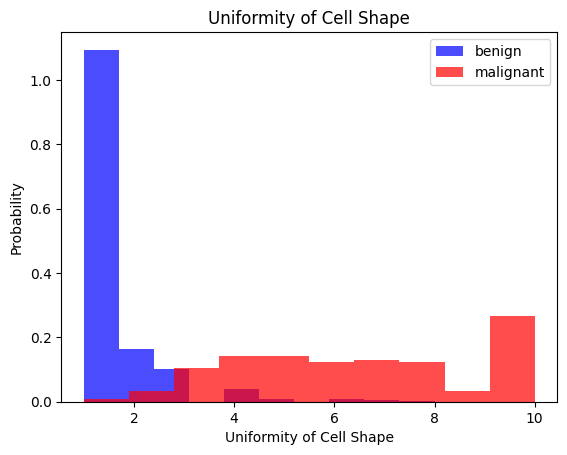

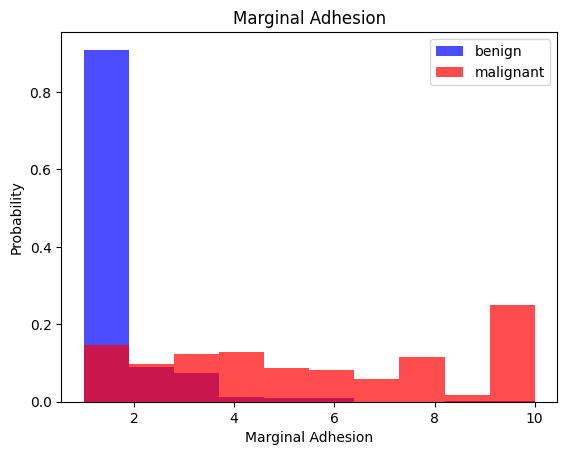

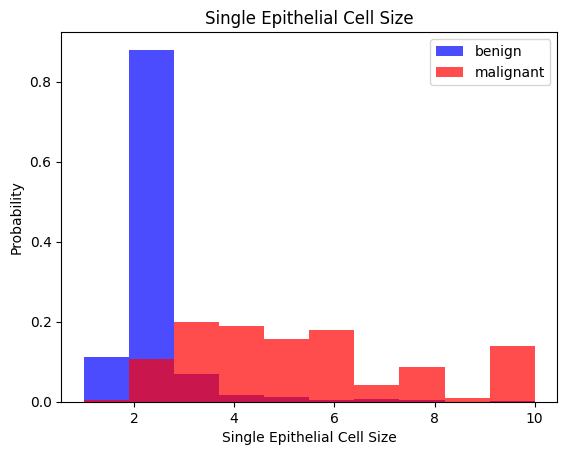

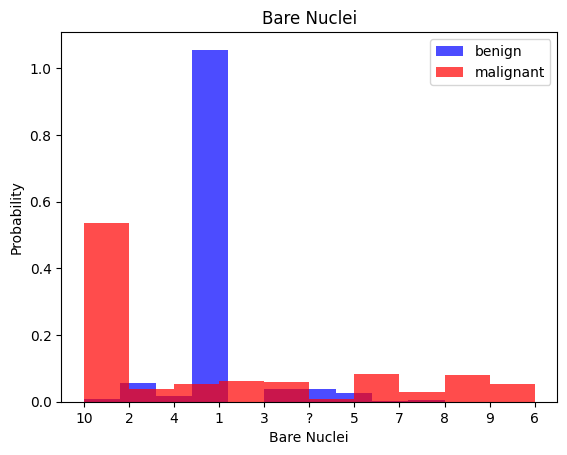

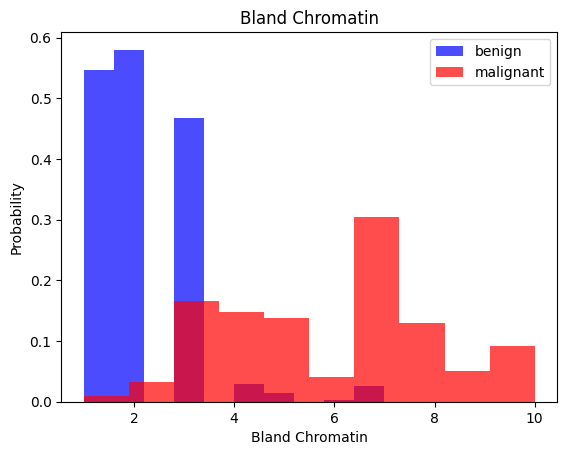

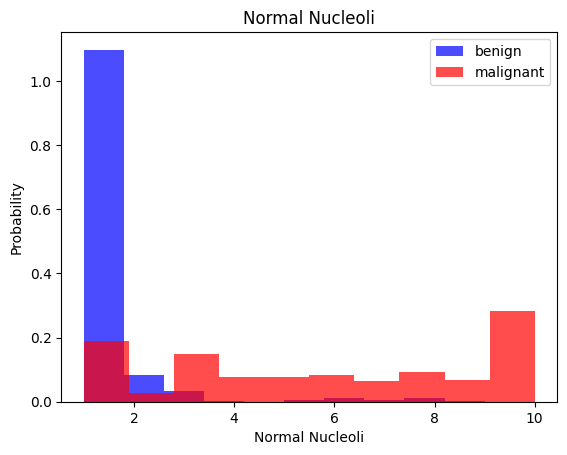

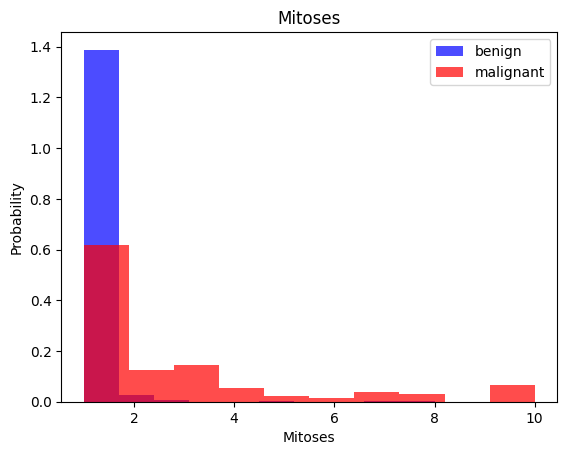

In [ ]:
df_cancer.columns
cols = ['Sample code number ', 'Clump Thickness', 'Uniformity of Cell Size ',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
for label in cols[1:-1]:
  plt.hist(df_cancer[df_cancer["Class"]==2][label], color='blue', label='benign', alpha=0.7, density=True)
  plt.hist(df_cancer[df_cancer["Class"]==4][label], color='red', label='malignant', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
train, valid, test = np.split(df_cancer.sample(frac=1), [int(0.6*len(df_cancer)), int(0.8*len(df_cancer))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
print(len(train[train['Class']==2]))
print(len(train[train['Class']==4]))

272
146


In [ ]:
filtered_df = df_cancer[df_cancer['Bare Nuclei'] == '?']


In [ ]:
filtered_df

Sample code number   Clump Thickness  Uniformity of Cell Size   \
22               1057013                8                         4   
39               1096800                6                         6   
138              1183246                1                         1   
144              1184840                1                         1   
157              1193683                1                         1   
163              1197510                5                         1   
234              1241232                3                         1   
248               169356                3                         1   
274               432809                3                         1   
291               563649                8                         8   
293               606140                1                         1   
296                61634                5                         4   
314               704168                4                         6   
320               733639                3                         1   
410              1238464                1                         1   
616              1057067                1                         1   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
22                          5                  1                            2   
39                          6                  9                            6   
138                         1                  1                            1   
144                         3                  1                            2   
157                         2                  1                            3   
163                         1                  1                            2   
234                         4                  1                            2   
248                         1                  1                            2   
274                         3                  1                            2   
291                         8                  1                            2   
293                         1                  1                            2   
296                         3                  1                            2   
314                         5                  6                            7   
320                         1                  1                            2   
410                         1                  1                            1   
616                         1                  1                            1   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
22            ?                7                3        1      4  
39            ?                7                8        1      2  
138           ?                2                1        1      2  
144           ?                2                1        1      2  
157           ?                1                1        1      2  
163           ?                3                1        1      2  
234           ?                3                1        1      2  
248           ?                3                1        1      2  
274           ?                2                1        1      2  
291           ?                6               10        1      4  
293           ?                2                1        1      2  
296           ?                2                3        1      2  
314           ?                4                9        1      2  
320           ?                3                1        1      2  
410           ?                2                1        1      2  
616           ?                1                1        1      2

In [ ]:
df_cancer = df_cancer.replace('?', '0')

In [ ]:
df_cancer

Sample code number   Clump Thickness  Uniformity of Cell Size   \
0                1002945                5                         4   
1                1015425                3                         1   
2                1016277                6                         8   
3                1017023                4                         1   
4                1017122                8                        10   
..                   ...              ...                       ...   
693               776715                3                         1   
694               841769                2                         1   
695               888820                5                        10   
696               897471                4                         8   
697               897471                4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            10                3                2        1      2  
1             2                3                1        1      2  
2             4                3                7        1      2  
3             1                3                1        1      2  
4            10                9                7        1      4  
..          ...              ...              ...      ...    ...  
693           2                1                1        1      2  
694           1                1                1        1      2  
695           3                8               10        2      4  
696           4               10                6        1      4  
697           5               10                4        1      4  

[698 rows x 11 columns]

In [ ]:
df_cancer

Sample code number   Clump Thickness  Uniformity of Cell Size   \
0                1002945                5                         4   
1                1015425                3                         1   
2                1016277                6                         8   
3                1017023                4                         1   
4                1017122                8                        10   
..                   ...              ...                       ...   
693               776715                3                         1   
694               841769                2                         1   
695               888820                5                        10   
696               897471                4                         8   
697               897471                4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            10                3                2        1      2  
1             2                3                1        1      2  
2             4                3                7        1      2  
3             1                3                1        1      2  
4            10                9                7        1      4  
..          ...              ...              ...      ...    ...  
693           2                1                1        1      2  
694           1                1                1        1      2  
695           3                8               10        2      4  
696           4               10                6        1      4  
697           5               10                4        1      4  

[698 rows x 11 columns]

In [ ]:
train, valid, test = np.split(df_cancer.sample(frac=1), [int(0.6*len(df_cancer)), int(0.8*len(df_cancer))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [ ]:
print(len(y_train == 2))
print(len(y_train == 4))


564
564


In [ ]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        82
           4       0.98      0.97      0.97        58

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier()
# Fit the model to the training data
rf_classifier.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.94      0.99      0.96        82
           4       0.98      0.91      0.95        58

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



In [ ]:
# Neural Network
import tensorflow as tf


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


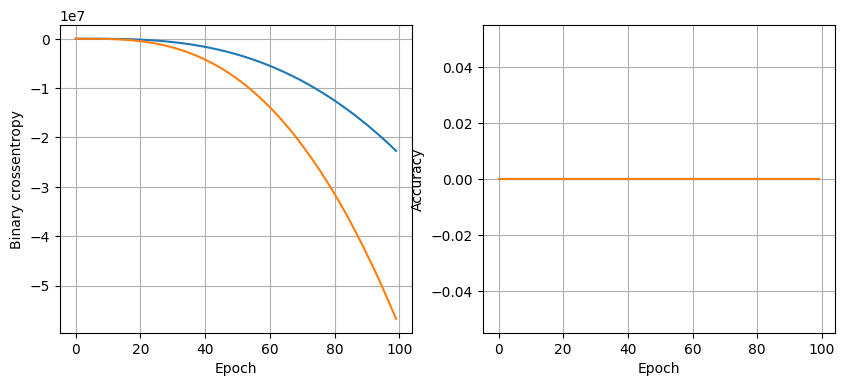

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: -20907642.0000
16 nodes, dropout 0, lr 0.01, batch size 64


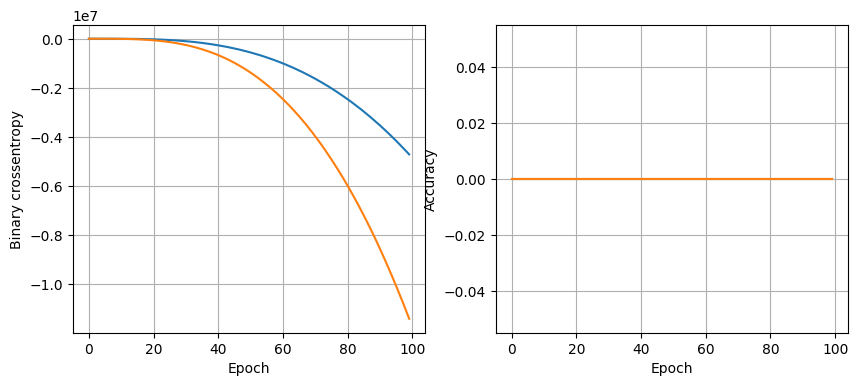

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -4377756.5000 
16 nodes, dropout 0, lr 0.01, batch size 128


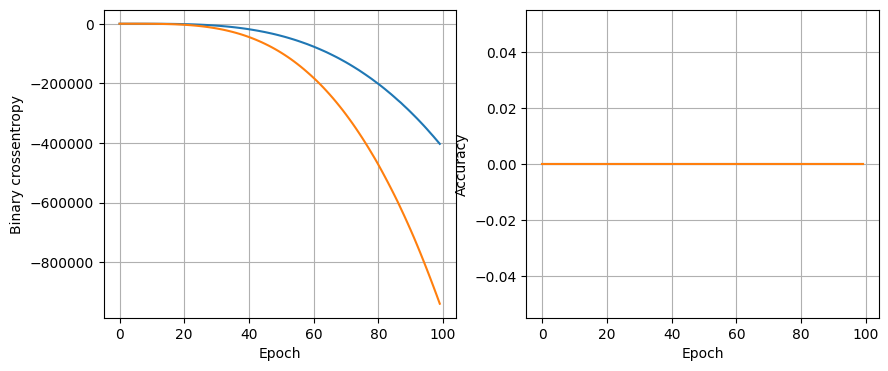

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -376903.3125 
16 nodes, dropout 0, lr 0.005, batch size 32


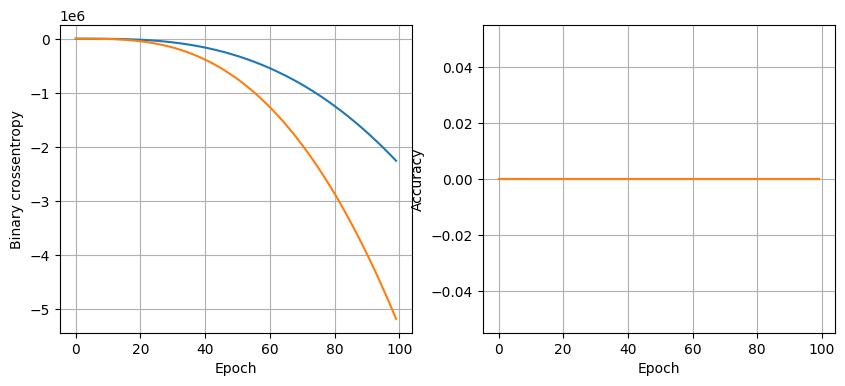

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -2105693.7500 
16 nodes, dropout 0, lr 0.005, batch size 64


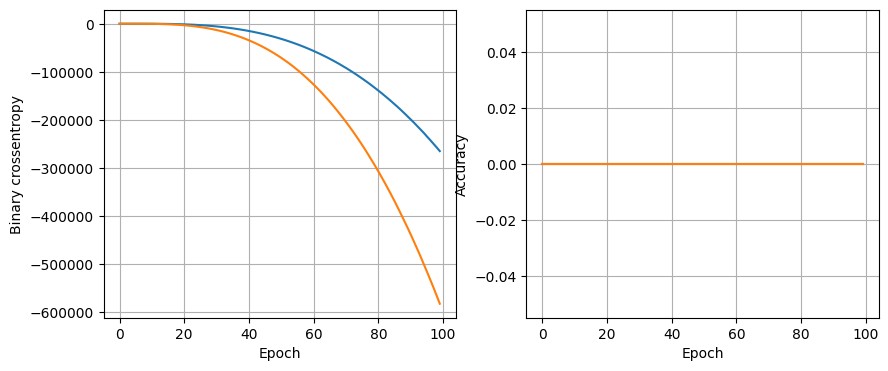

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -248927.1406 
16 nodes, dropout 0, lr 0.005, batch size 128


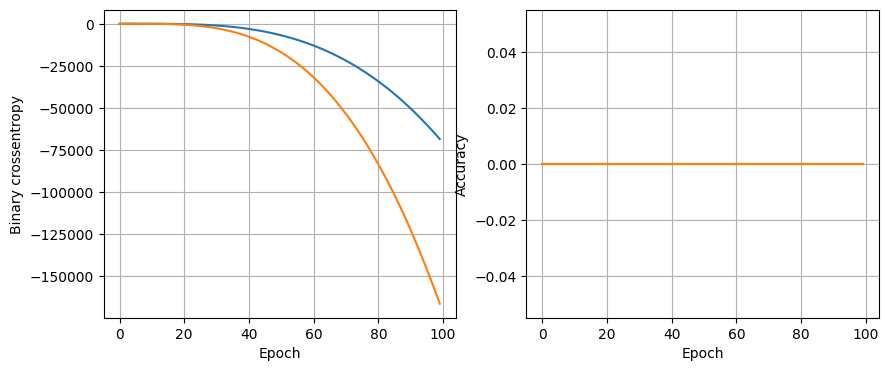

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -63704.1328 
16 nodes, dropout 0, lr 0.001, batch size 32


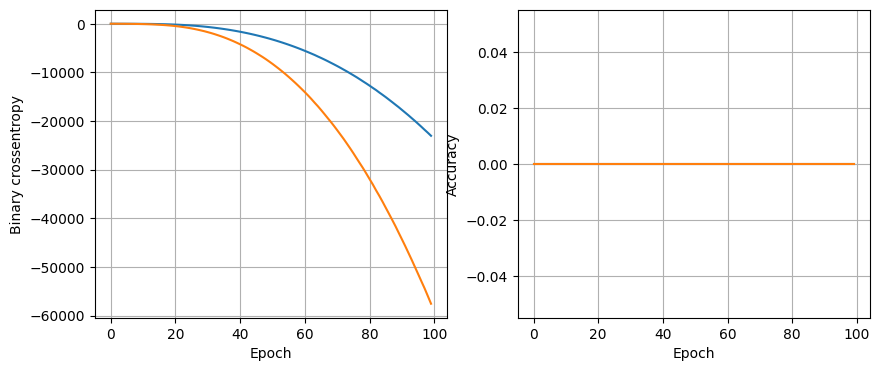

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -21227.3262 
16 nodes, dropout 0, lr 0.001, batch size 64


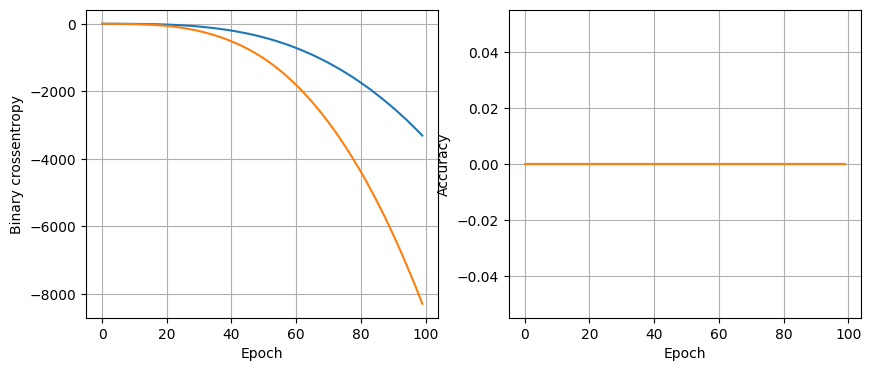

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -3051.0298 
16 nodes, dropout 0, lr 0.001, batch size 128


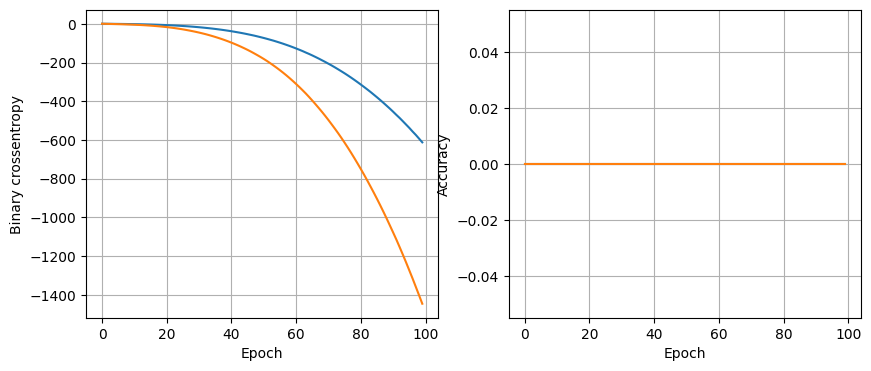

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -573.6187 
16 nodes, dropout 0.2, lr 0.01, batch size 32


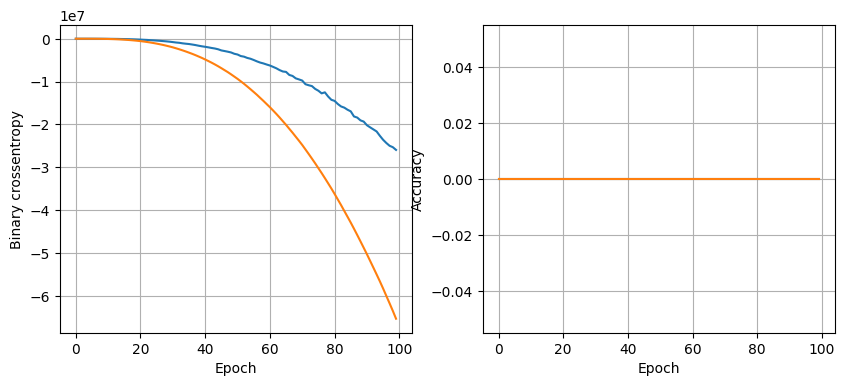

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -24224876.0000 
16 nodes, dropout 0.2, lr 0.01, batch size 64


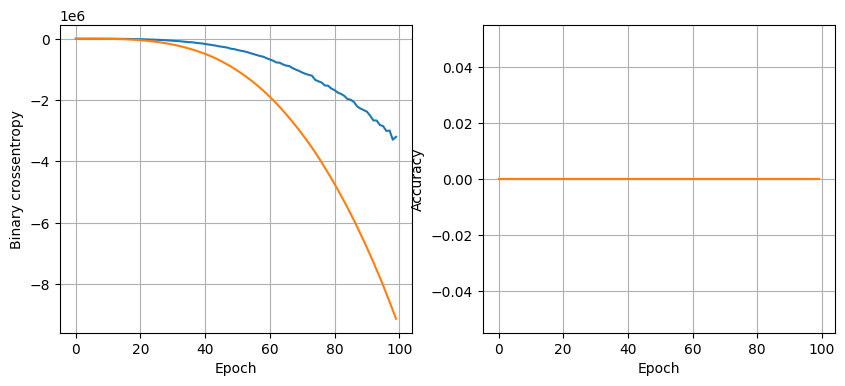

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -2931831.0000 
16 nodes, dropout 0.2, lr 0.01, batch size 128


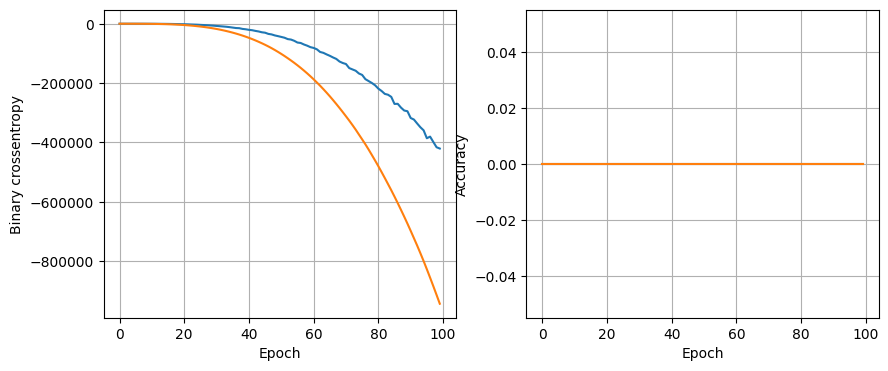

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -402474.9688
16 nodes, dropout 0.2, lr 0.005, batch size 32


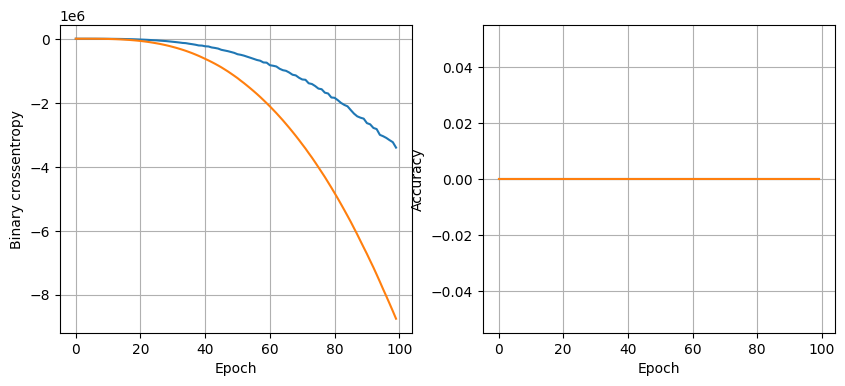

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -3116281.5000
16 nodes, dropout 0.2, lr 0.005, batch size 64


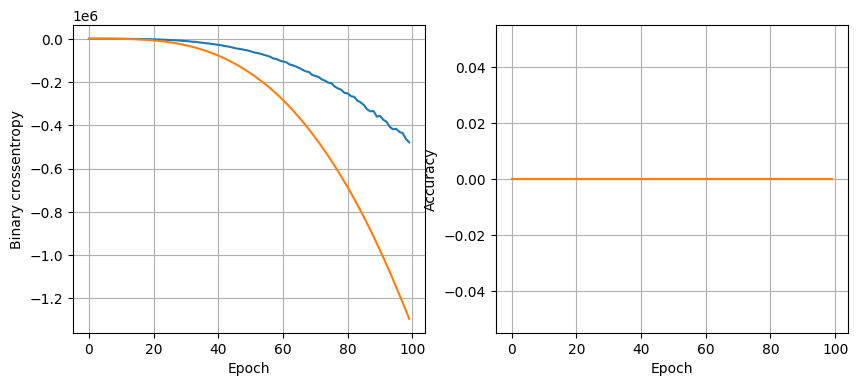

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -441034.5625 
16 nodes, dropout 0.2, lr 0.005, batch size 128


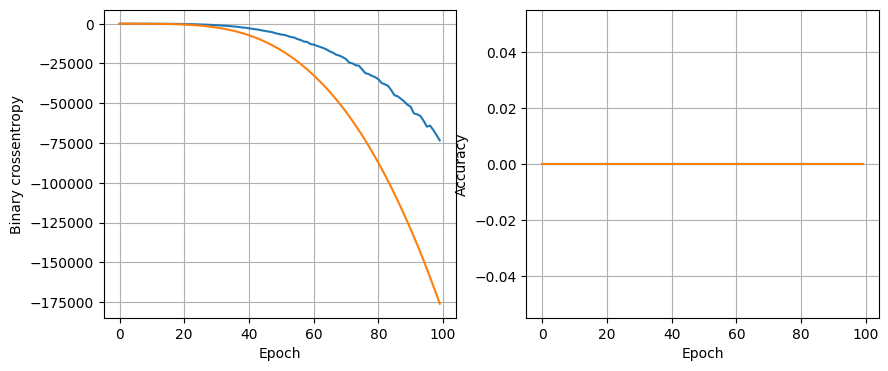

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -67421.8750 
16 nodes, dropout 0.2, lr 0.001, batch size 32


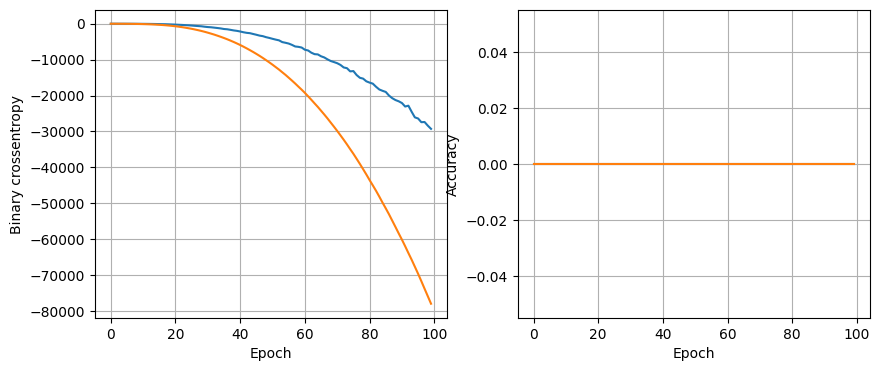

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -26740.7910 
16 nodes, dropout 0.2, lr 0.001, batch size 64


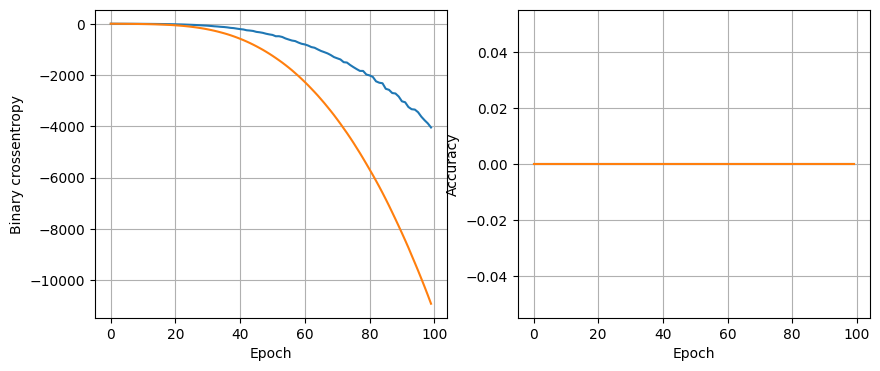

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -3596.4468 
16 nodes, dropout 0.2, lr 0.001, batch size 128


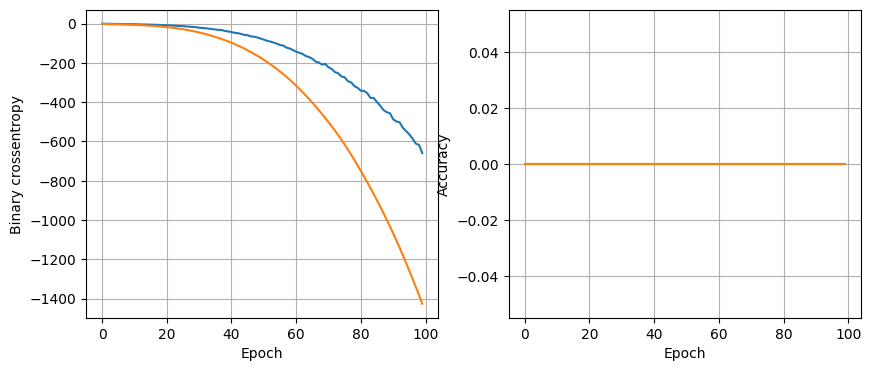

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -609.4501 
32 nodes, dropout 0, lr 0.01, batch size 32


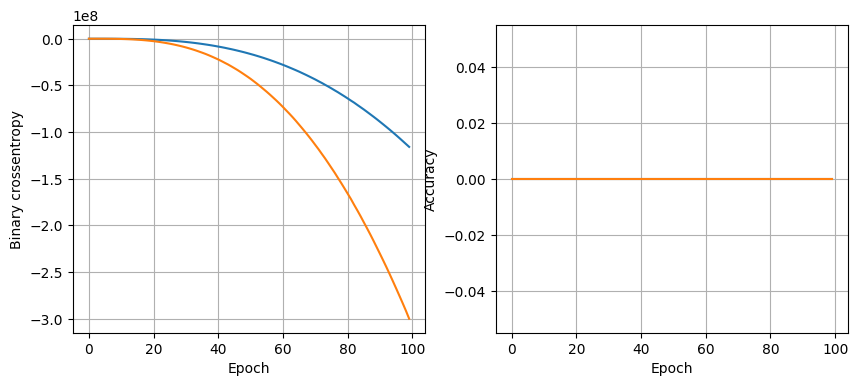

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -106324336.0000 
32 nodes, dropout 0, lr 0.01, batch size 64


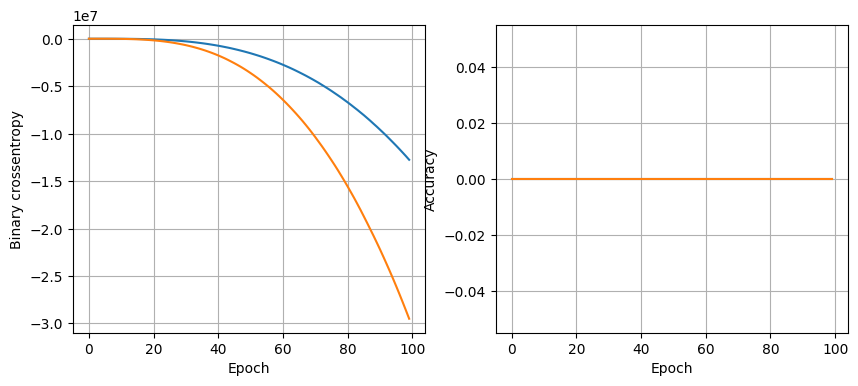

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -11900157.0000 
32 nodes, dropout 0, lr 0.01, batch size 128


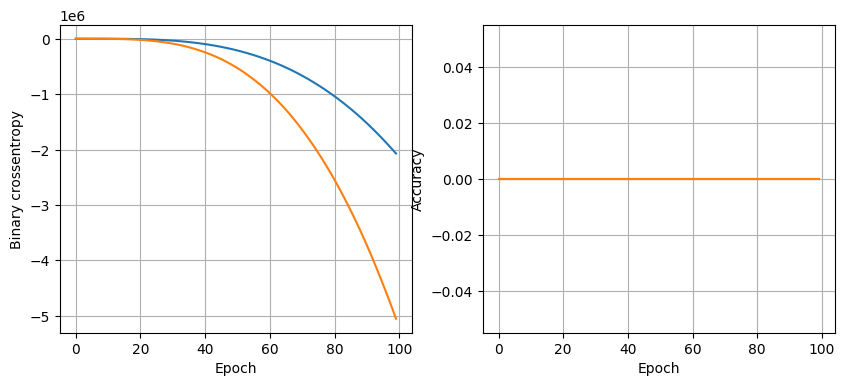

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -1925753.2500 
32 nodes, dropout 0, lr 0.005, batch size 32


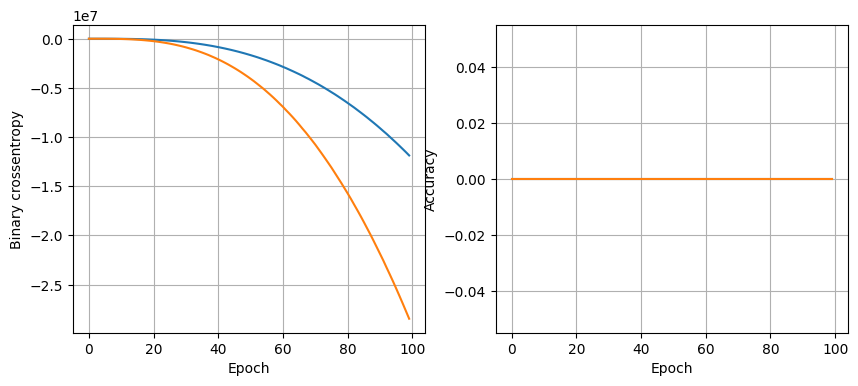

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -11002556.0000 
32 nodes, dropout 0, lr 0.005, batch size 64


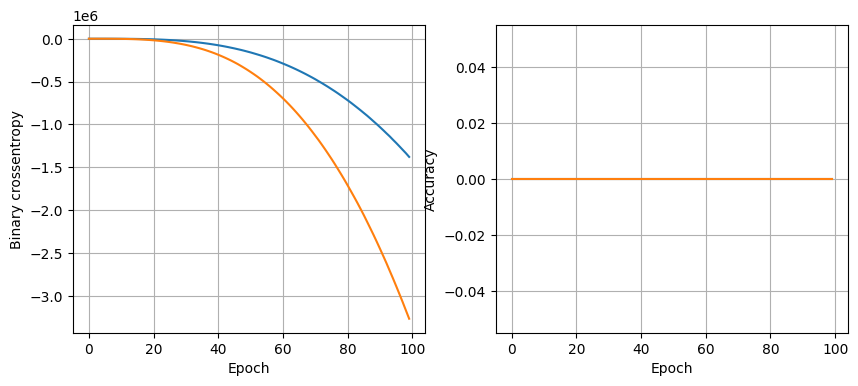

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -1282722.6250 
32 nodes, dropout 0, lr 0.005, batch size 128


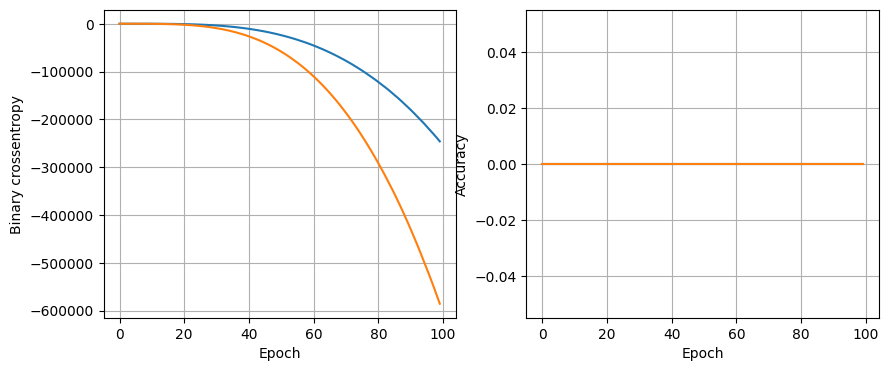

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -229648.7500 
32 nodes, dropout 0, lr 0.001, batch size 32


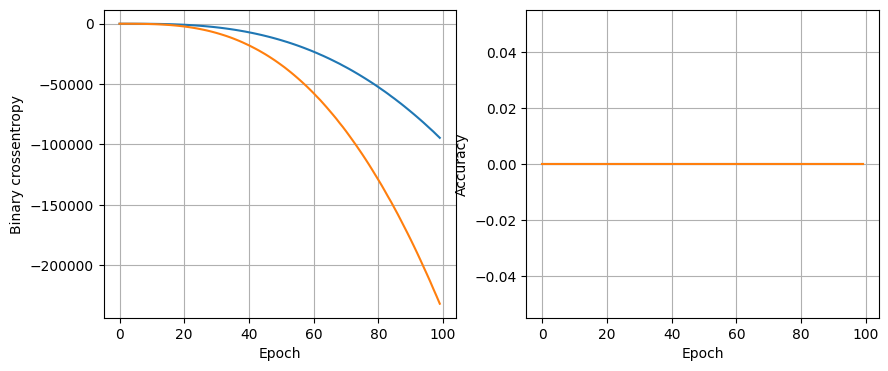

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -87344.7109 
32 nodes, dropout 0, lr 0.001, batch size 64


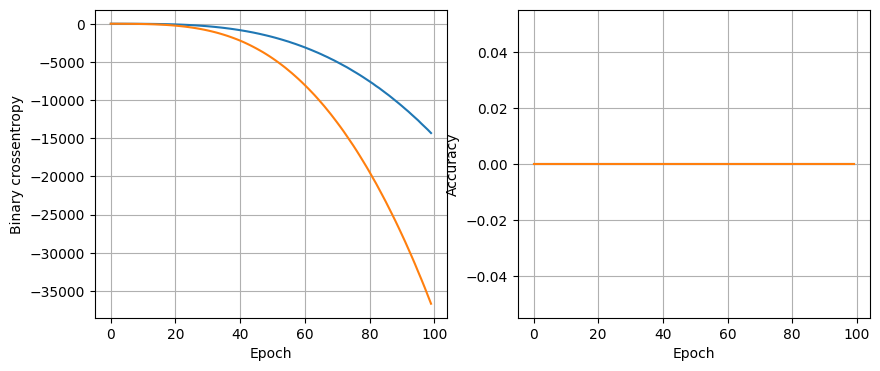

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -13166.9854 
32 nodes, dropout 0, lr 0.001, batch size 128


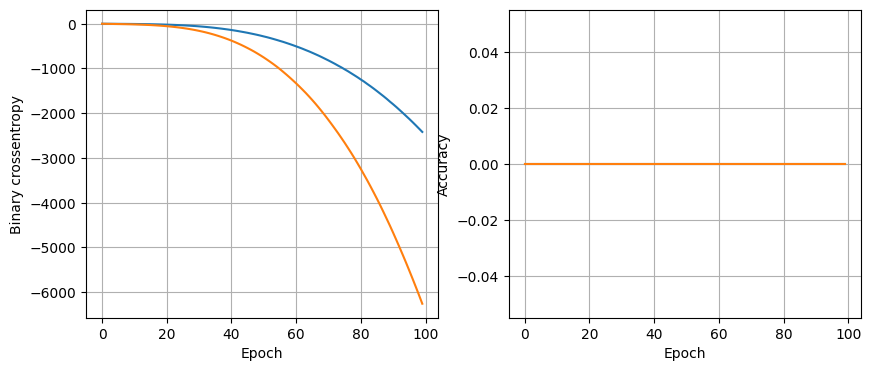

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -2222.3174 
32 nodes, dropout 0.2, lr 0.01, batch size 32


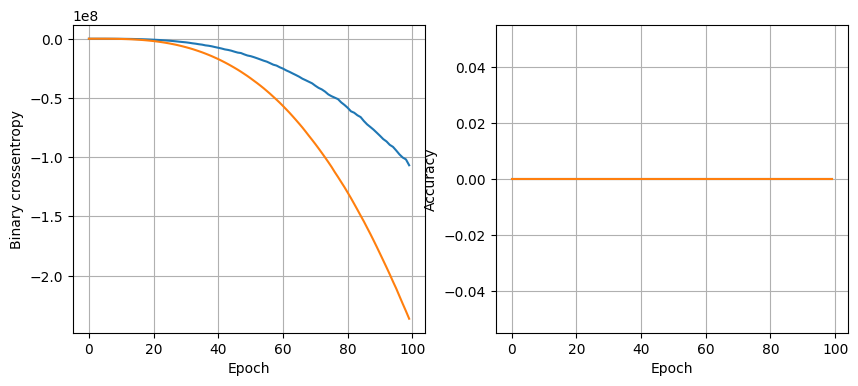

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -99875816.0000  
32 nodes, dropout 0.2, lr 0.01, batch size 64


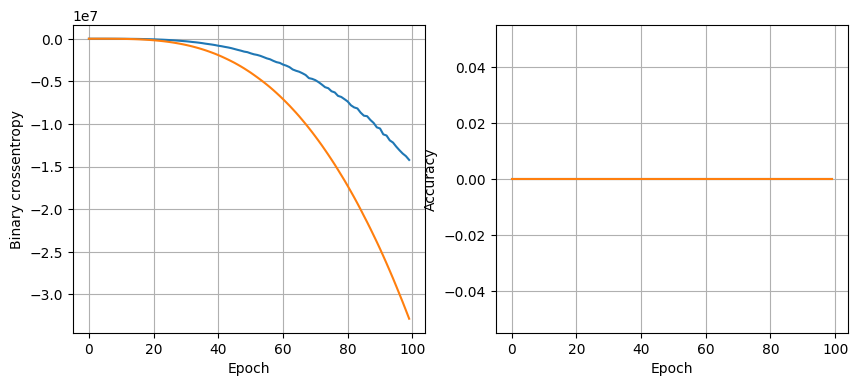

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: -13327754.0000
32 nodes, dropout 0.2, lr 0.01, batch size 128


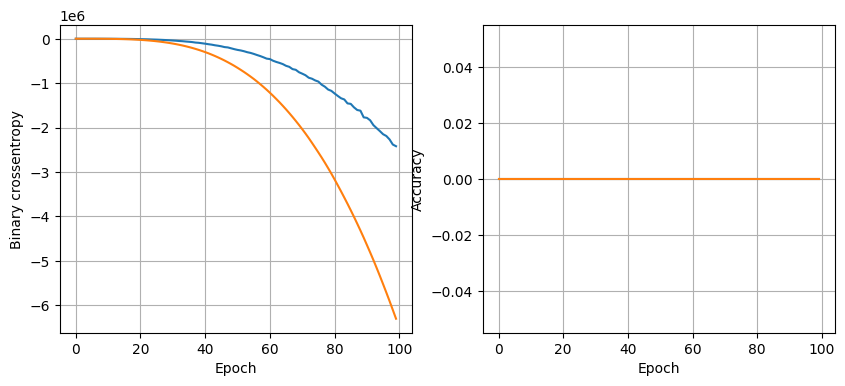

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -2258209.0000 
32 nodes, dropout 0.2, lr 0.005, batch size 32


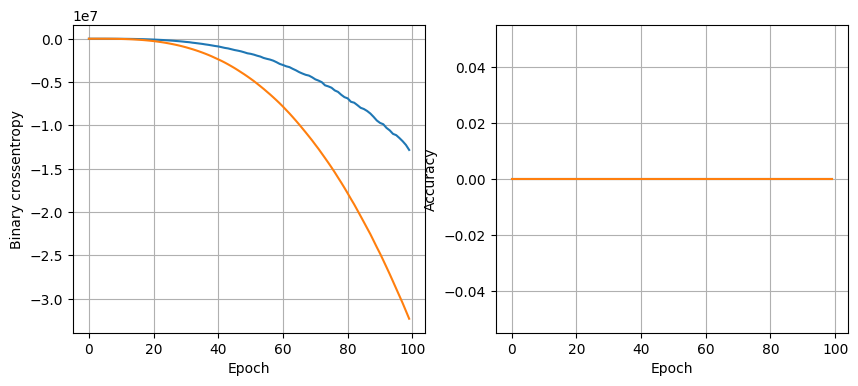

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -11481636.0000 
32 nodes, dropout 0.2, lr 0.005, batch size 64


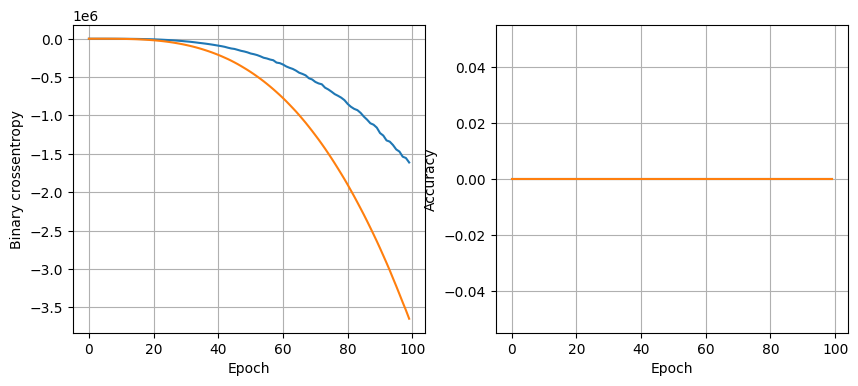

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -1524196.2500 
32 nodes, dropout 0.2, lr 0.005, batch size 128


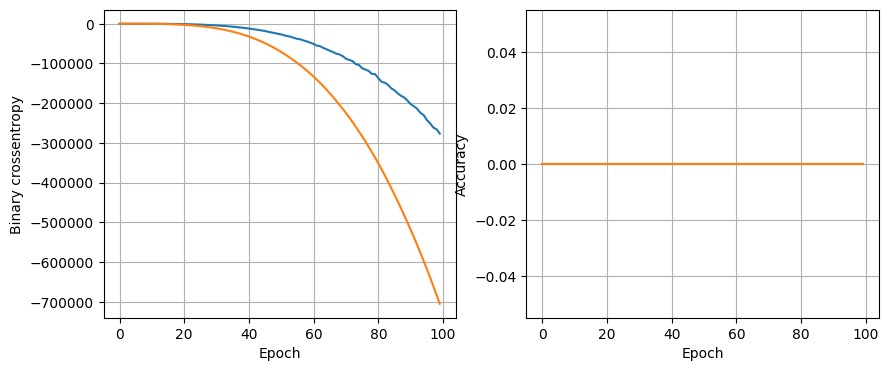

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -252687.6875 
32 nodes, dropout 0.2, lr 0.001, batch size 32


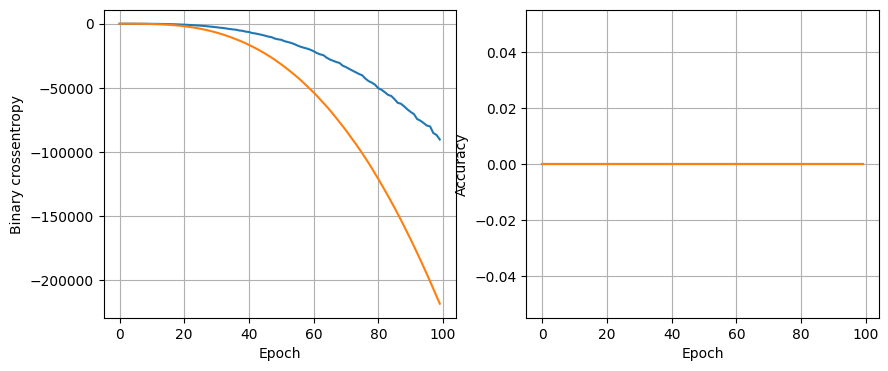

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -82778.9531 
32 nodes, dropout 0.2, lr 0.001, batch size 64


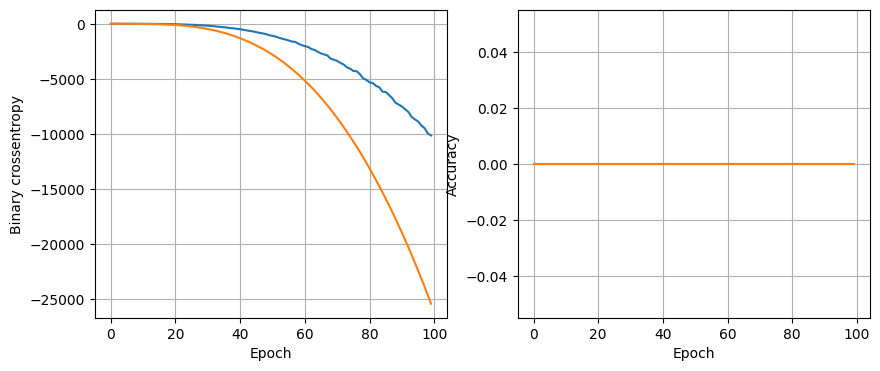

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -9366.5811  
32 nodes, dropout 0.2, lr 0.001, batch size 128


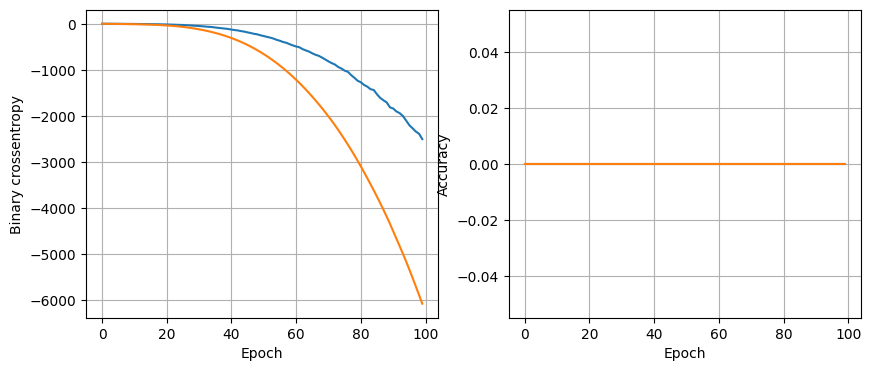

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: -2318.7671
64 nodes, dropout 0, lr 0.01, batch size 32


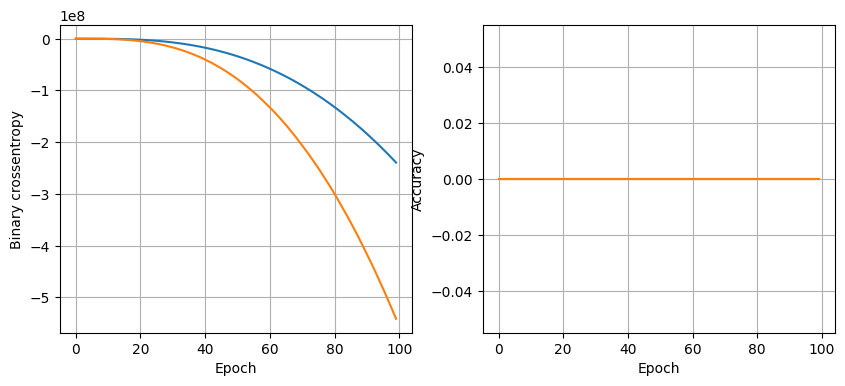

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: -223865344.0000
64 nodes, dropout 0, lr 0.01, batch size 64


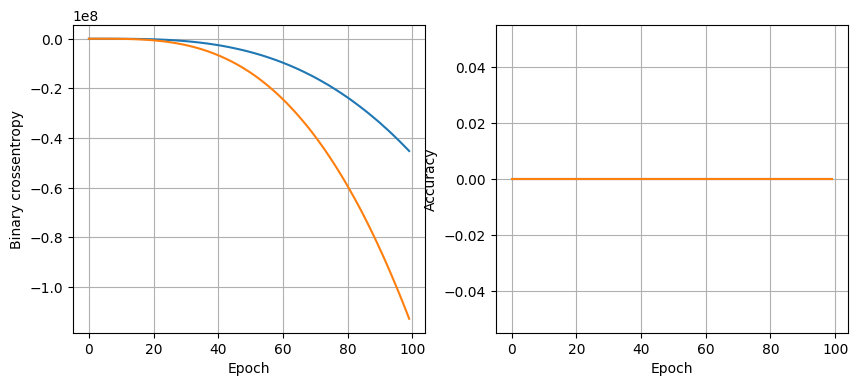

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -41691436.0000
64 nodes, dropout 0, lr 0.01, batch size 128


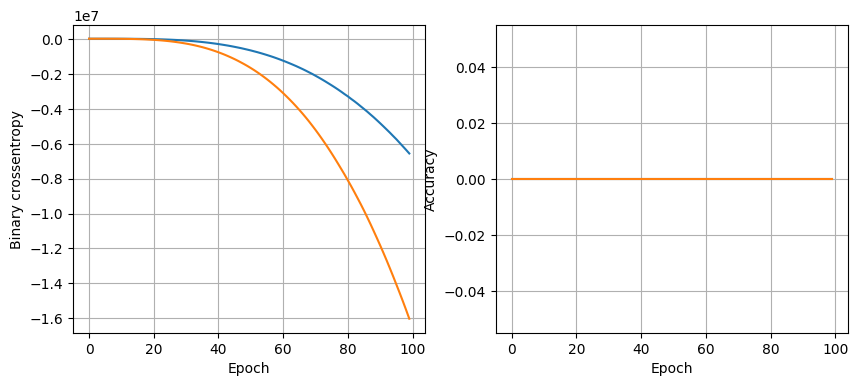

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -6104530.0000 
64 nodes, dropout 0, lr 0.005, batch size 32


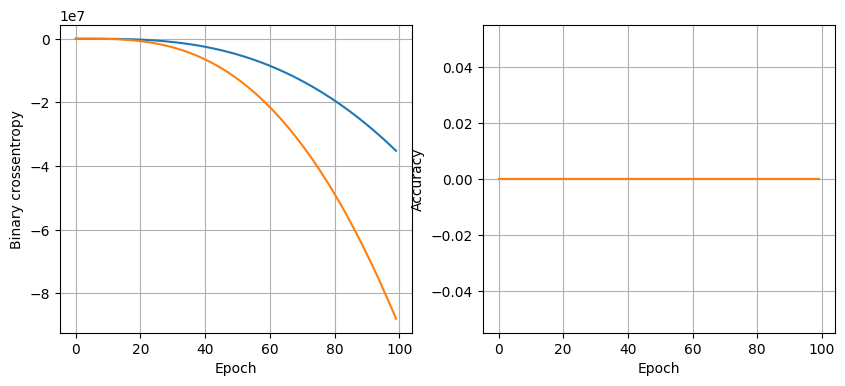

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -32398364.0000 
64 nodes, dropout 0, lr 0.005, batch size 64


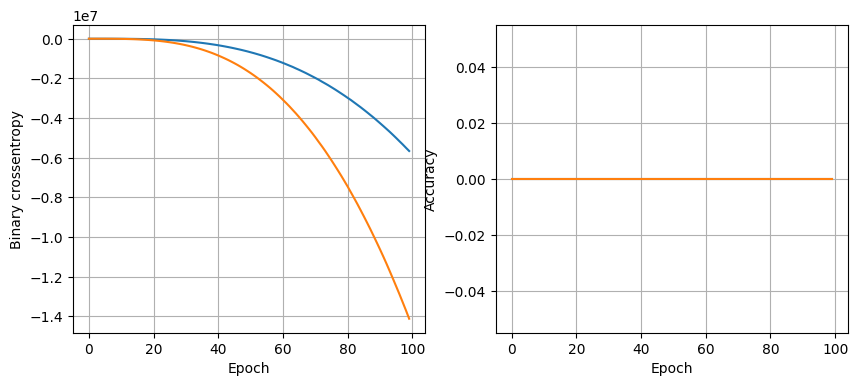

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -5223109.0000 
64 nodes, dropout 0, lr 0.005, batch size 128


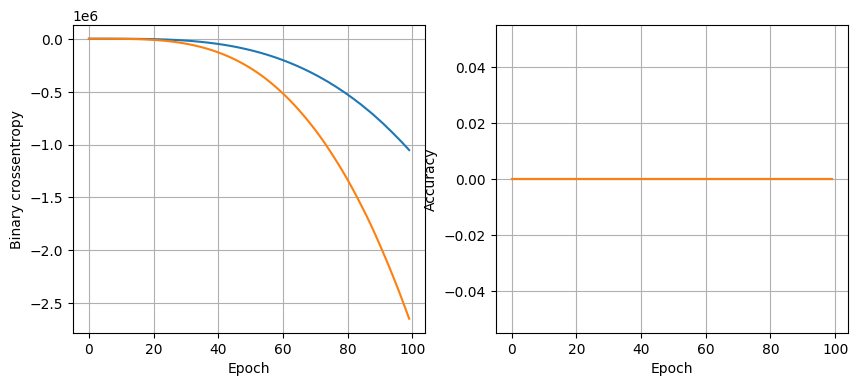

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -974448.9375  
64 nodes, dropout 0, lr 0.001, batch size 32


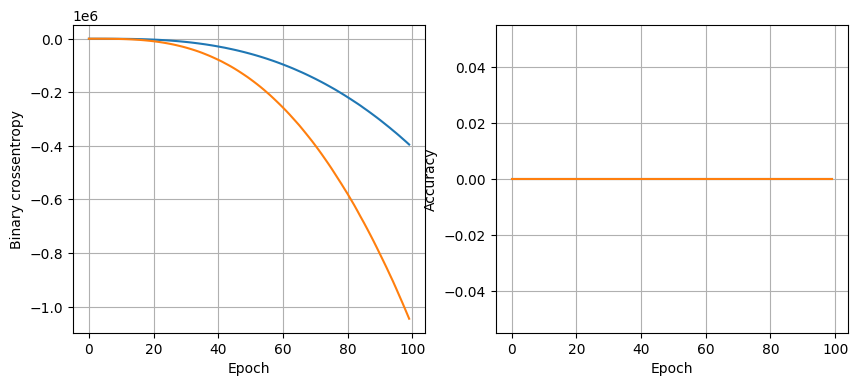

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -360656.2188 
64 nodes, dropout 0, lr 0.001, batch size 64


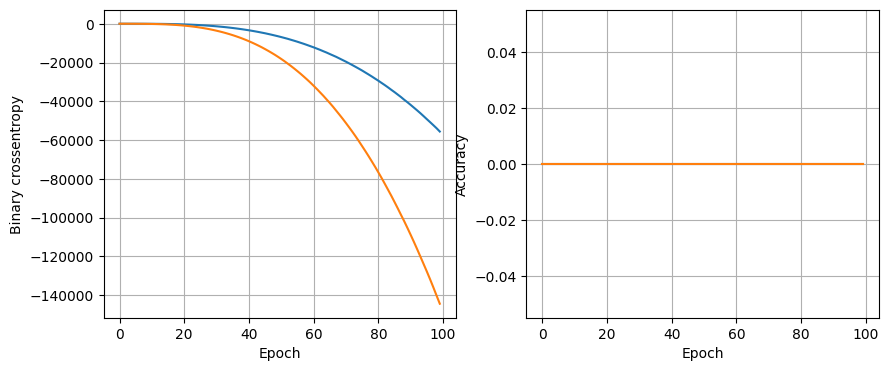

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -50927.4531 
64 nodes, dropout 0, lr 0.001, batch size 128


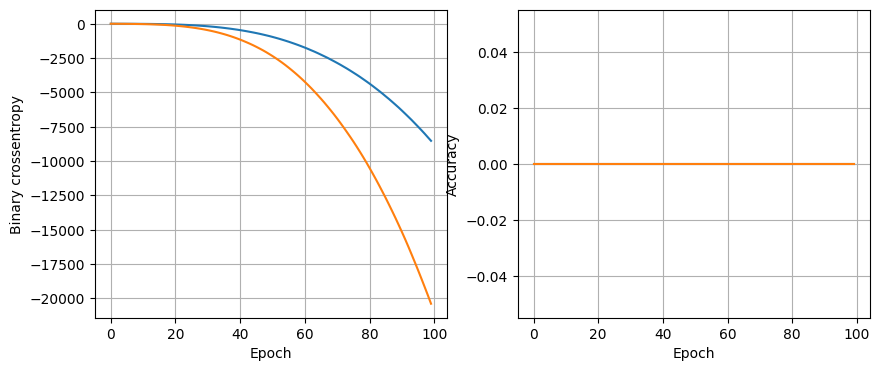

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: -7949.7017
64 nodes, dropout 0.2, lr 0.01, batch size 32


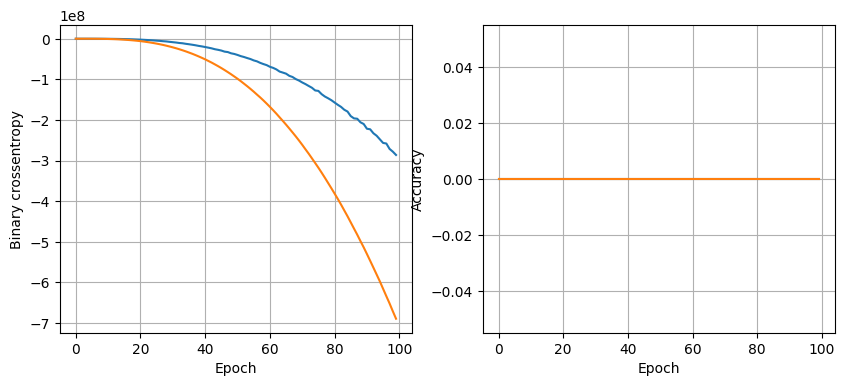

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: -264369184.0000
64 nodes, dropout 0.2, lr 0.01, batch size 64


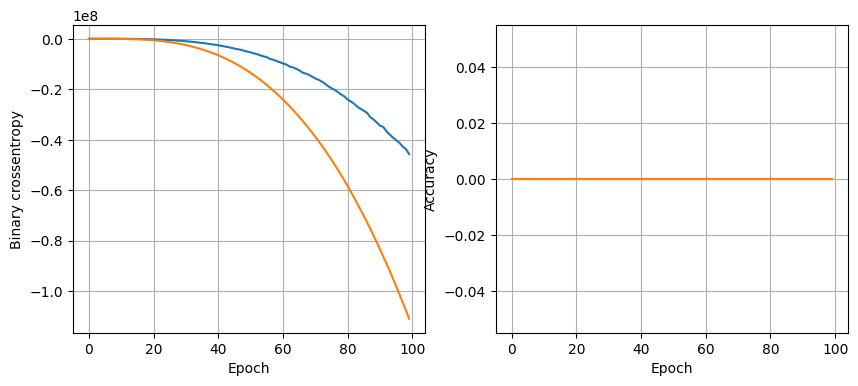

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -42117344.0000 
64 nodes, dropout 0.2, lr 0.01, batch size 128


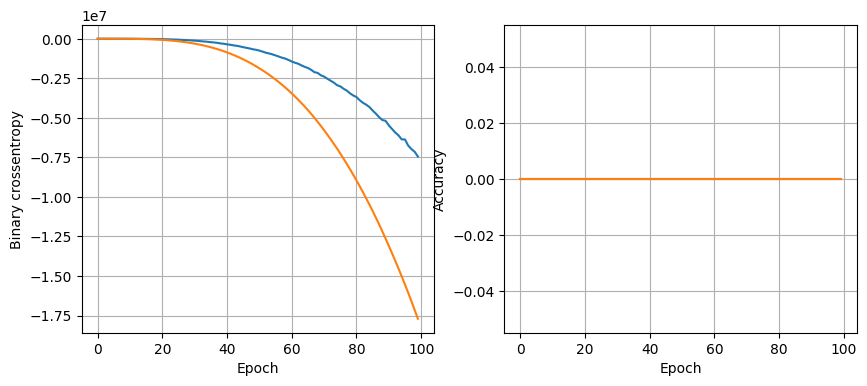

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -6933208.5000 
64 nodes, dropout 0.2, lr 0.005, batch size 32


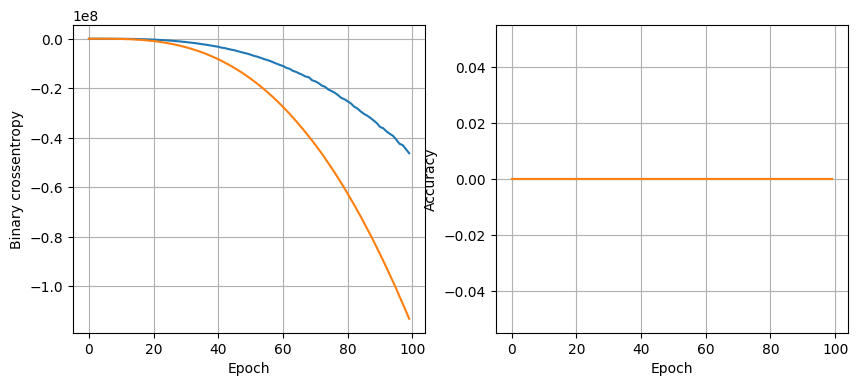

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -42381936.0000 
64 nodes, dropout 0.2, lr 0.005, batch size 64


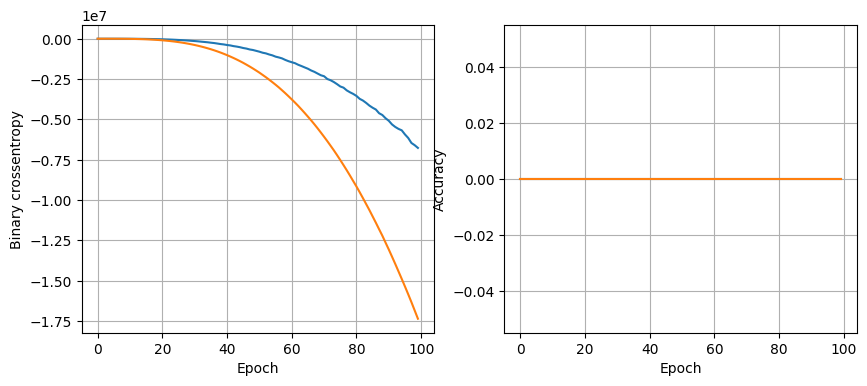

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -6235505.5000 
64 nodes, dropout 0.2, lr 0.005, batch size 128


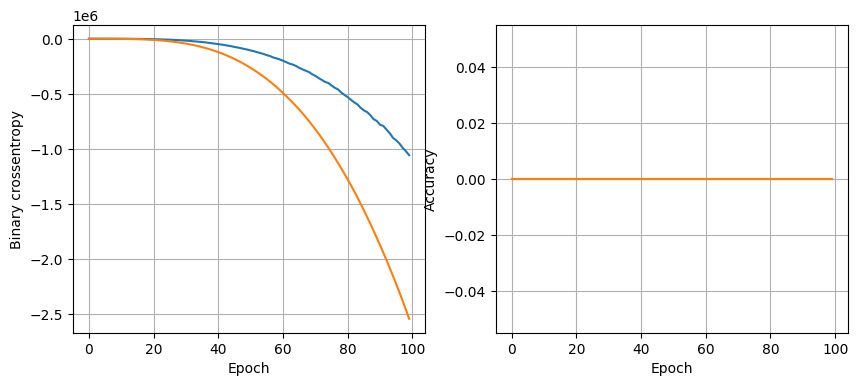

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -981793.6875 
64 nodes, dropout 0.2, lr 0.001, batch size 32


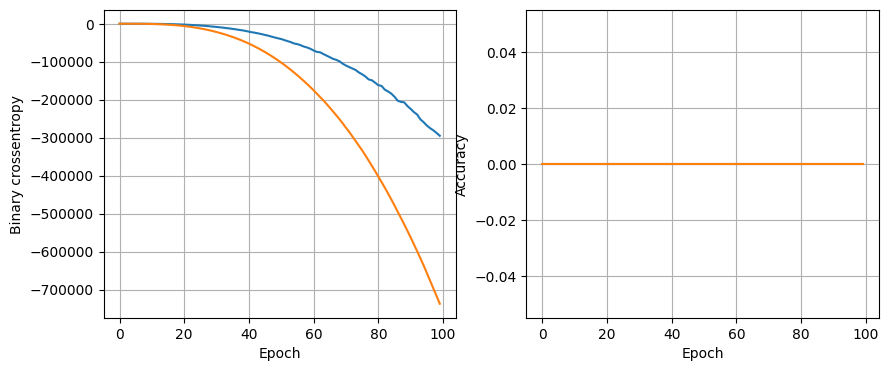

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -273571.8438
64 nodes, dropout 0.2, lr 0.001, batch size 64


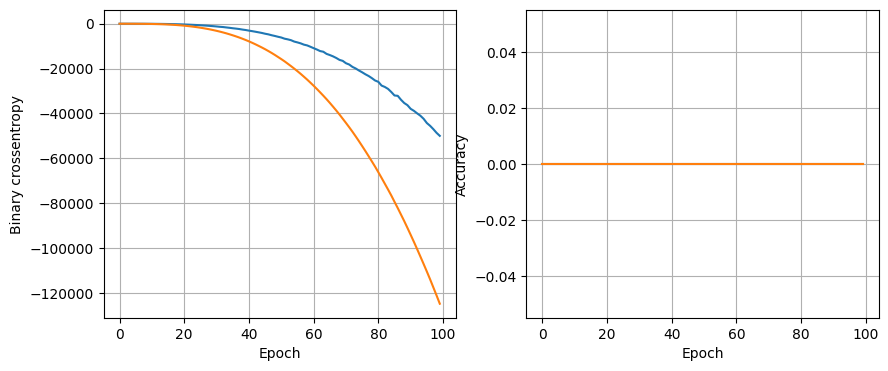

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -45955.0703
64 nodes, dropout 0.2, lr 0.001, batch size 128


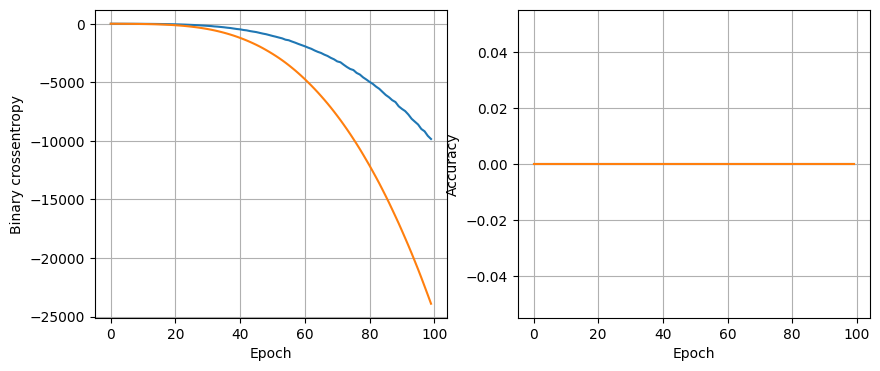

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: -9141.2812


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      88.0
           4       0.00      0.00      0.00      52.0

    accuracy                           0.00     140.0
   macro avg       0.00      0.00      0.00     140.0
weighted avg       0.00      0.00      0.00     140.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
# attempt two
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
df_cancer['Class'] = df_cancer['Class'].replace({2: 0, 4: 1})

In [ ]:
df_cancer

Sample code number   Clump Thickness  Uniformity of Cell Size   \
0                1002945                5                         4   
1                1015425                3                         1   
2                1016277                6                         8   
3                1017023                4                         1   
4                1017122                8                        10   
..                   ...              ...                       ...   
693               776715                3                         1   
694               841769                2                         1   
695               888820                5                        10   
696               897471                4                         8   
697               897471                4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            10                3                2        1      0  
1             2                3                1        1      0  
2             4                3                7        1      0  
3             1                3                1        1      0  
4            10                9                7        1      1  
..          ...              ...              ...      ...    ...  
693           2                1                1        1      0  
694           1                1                1        1      0  
695           3                8               10        2      1  
696           4               10                6        1      1  
697           5               10                4        1      1  

[698 rows x 11 columns]

In [ ]:
train, valid, test = np.split(df_cancer.sample(frac=1), [int(0.6*len(df_cancer)), int(0.8*len(df_cancer))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y



In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [ ]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


# Create a neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
df_cancer

In [ ]:
train, valid, test = np.split(df_cancer.sample(frac=1), [int(0.6*len(df_cancer)), int(0.8*len(df_cancer))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [ ]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# keras tryer again
import tensorflow as tf

In [ ]:
df_cancer

Sample code number   Clump Thickness  Uniformity of Cell Size   \
0                1002945                5                         4   
1                1015425                3                         1   
2                1016277                6                         8   
3                1017023                4                         1   
4                1017122                8                        10   
..                   ...              ...                       ...   
693               776715                3                         1   
694               841769                2                         1   
695               888820                5                        10   
696               897471                4                         8   
697               897471                4                         8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                           8                  1                            3   
3                           1                  3                            2   
4                          10                  8                            7   
..                        ...                ...                          ...   
693                         1                  1                            3   
694                         1                  1                            2   
695                        10                  3                            7   
696                         6                  4                            3   
697                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            10                3                2        1      0  
1             2                3                1        1      0  
2             4                3                7        1      0  
3             1                3                1        1      0  
4            10                9                7        1      1  
..          ...              ...              ...      ...    ...  
693           2                1                1        1      0  
694           1                1                1        1      0  
695           3                8               10        2      1  
696           4               10                6        1      1  
697           5               10                4        1      1  

[698 rows x 11 columns]

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


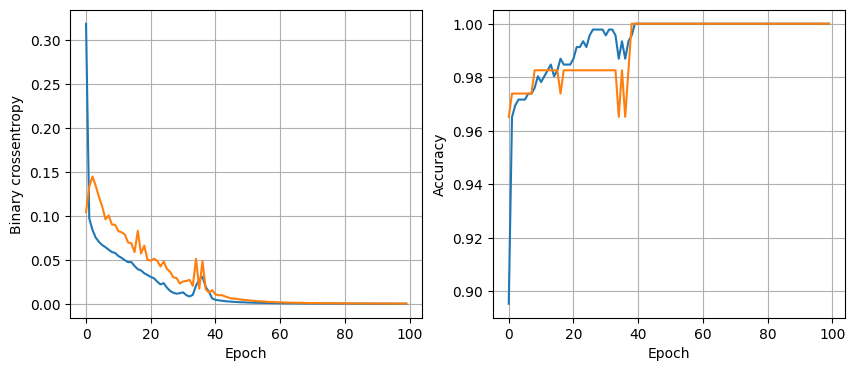

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9246 - loss: 0.6193 
16 nodes, dropout 0, lr 0.01, batch size 64


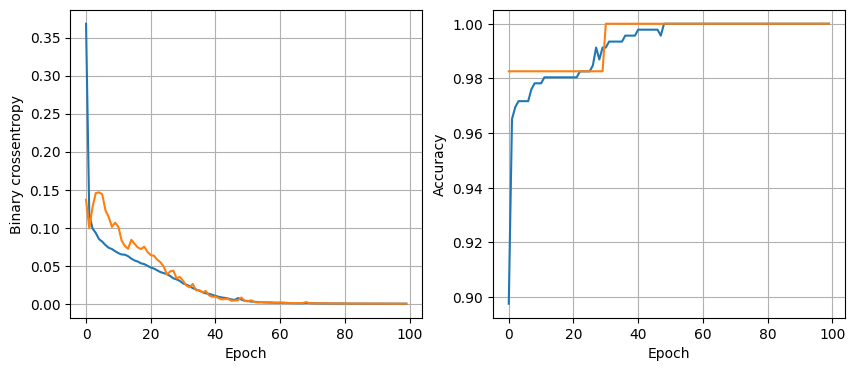

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.6346 
16 nodes, dropout 0, lr 0.01, batch size 128


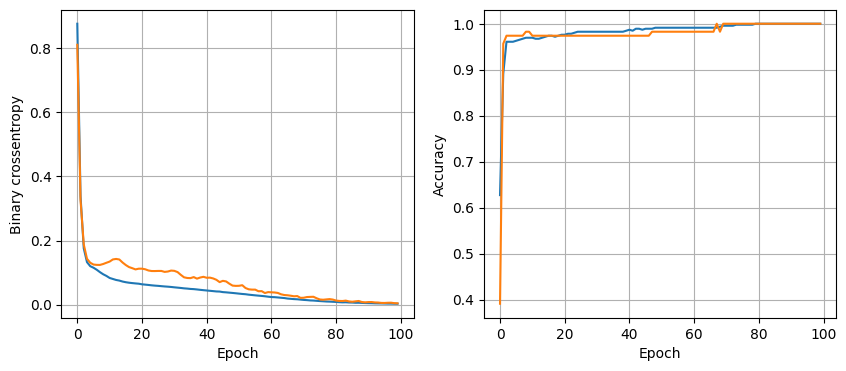

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9311 - loss: 0.3443 
16 nodes, dropout 0, lr 0.005, batch size 32


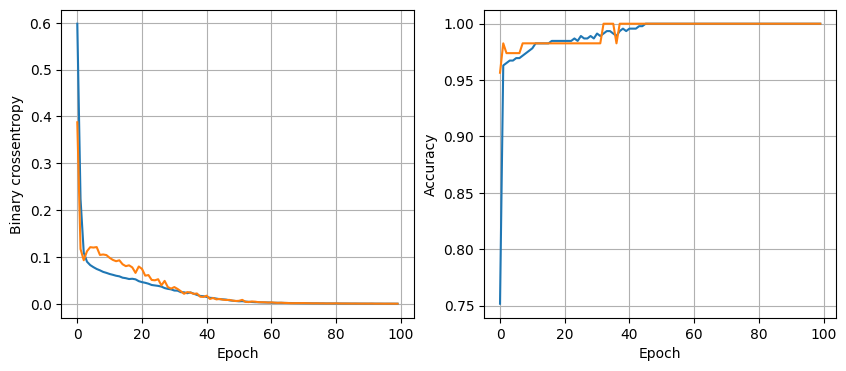

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9157 - loss: 0.4359 
16 nodes, dropout 0, lr 0.005, batch size 64


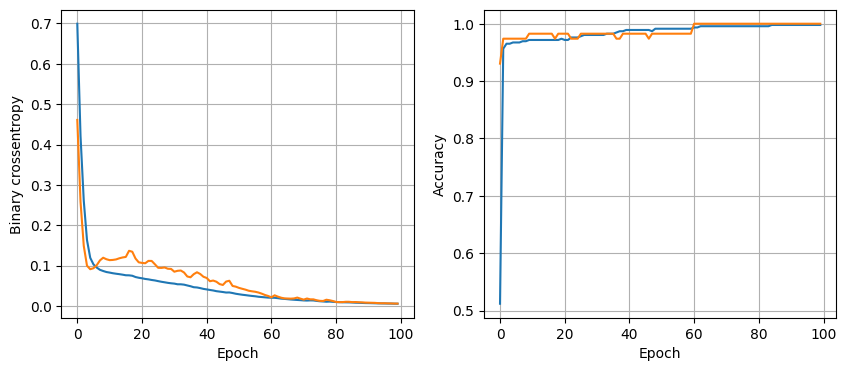

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9233 - loss: 0.2991 
16 nodes, dropout 0, lr 0.005, batch size 128


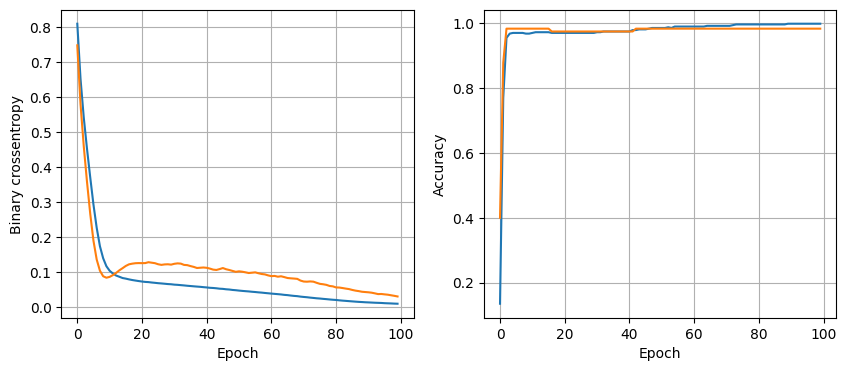

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9326 - loss: 0.2392 
16 nodes, dropout 0, lr 0.001, batch size 32


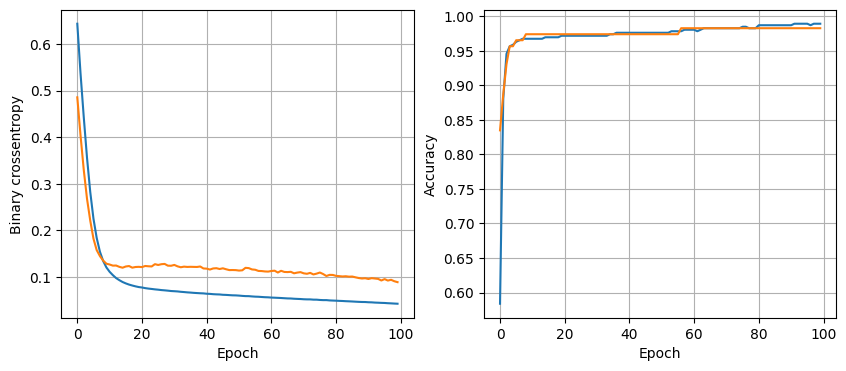

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9723 - loss: 0.1030 
16 nodes, dropout 0, lr 0.001, batch size 64


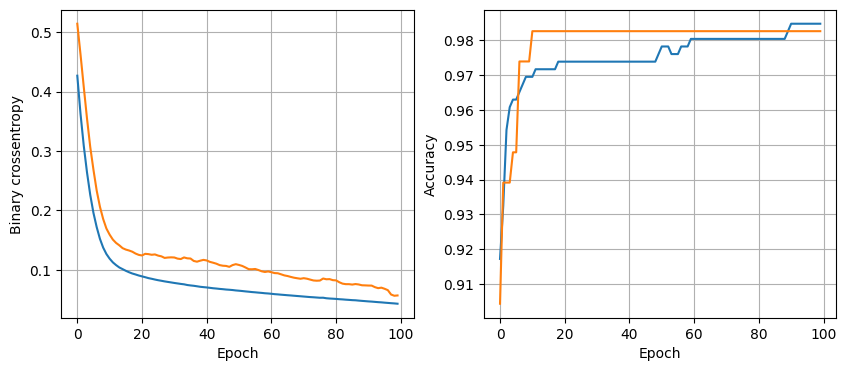

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.1032 
16 nodes, dropout 0, lr 0.001, batch size 128


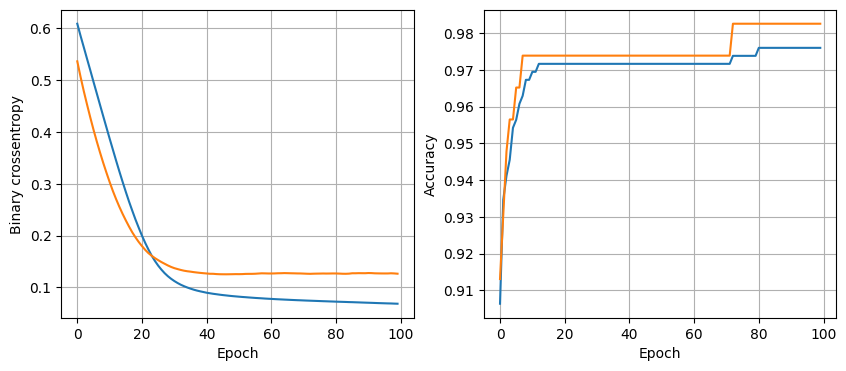

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9621 - loss: 0.0928 
16 nodes, dropout 0.2, lr 0.01, batch size 32


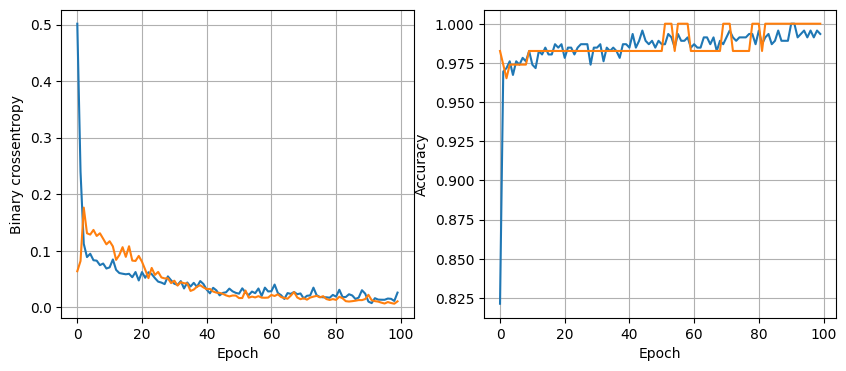

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9597 - loss: 0.3865 
16 nodes, dropout 0.2, lr 0.01, batch size 64


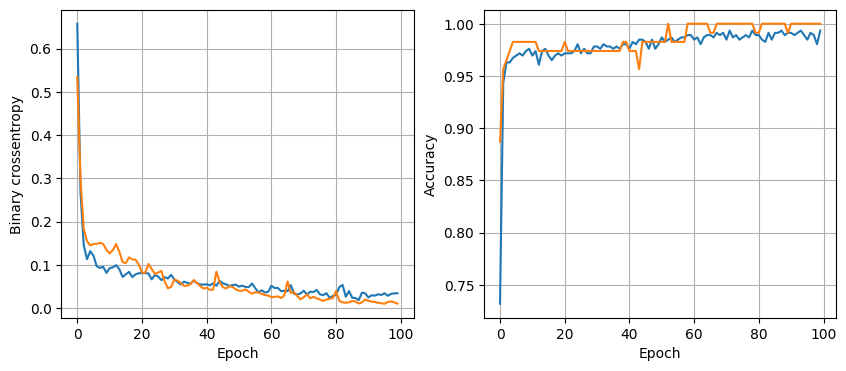

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9471 - loss: 0.1987 
16 nodes, dropout 0.2, lr 0.01, batch size 128


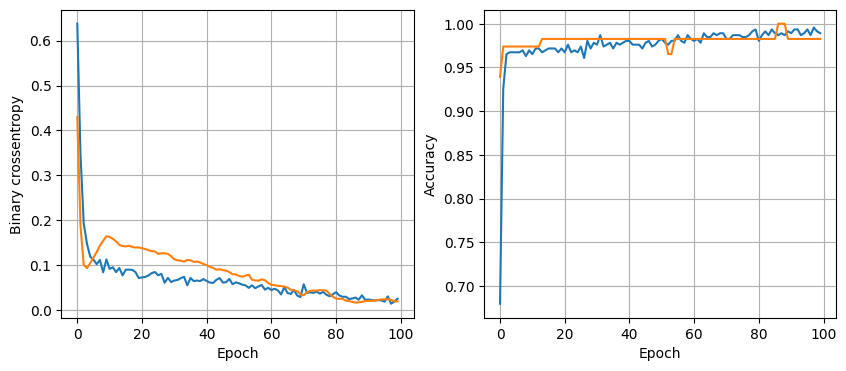

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9404 - loss: 0.2095 
16 nodes, dropout 0.2, lr 0.005, batch size 32


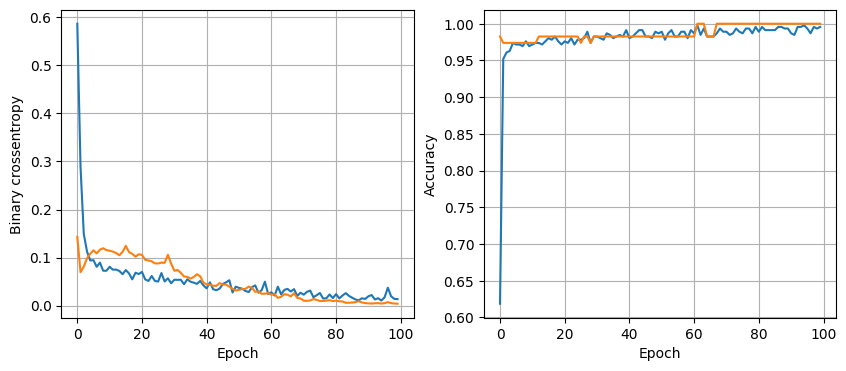

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9627 - loss: 0.2644 
16 nodes, dropout 0.2, lr 0.005, batch size 64


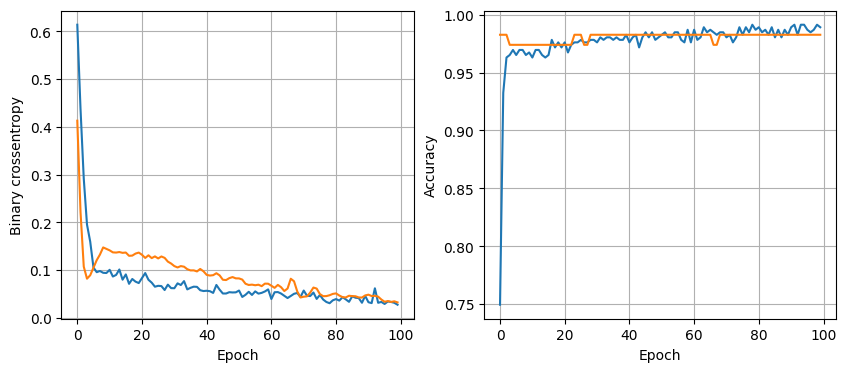

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9495 - loss: 0.1722 
16 nodes, dropout 0.2, lr 0.005, batch size 128


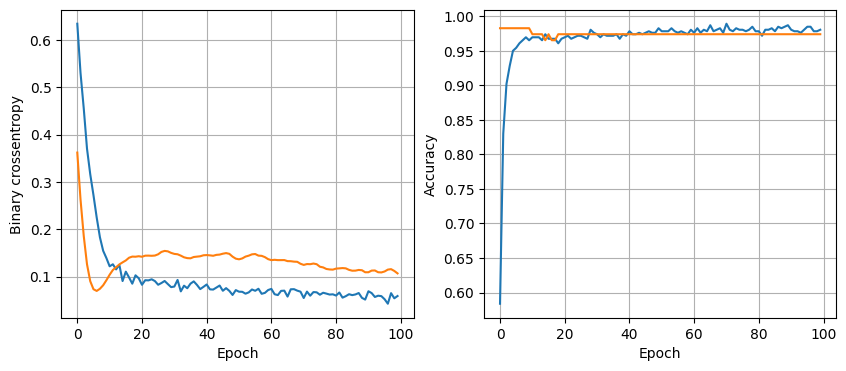

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9668 - loss: 0.1137 
16 nodes, dropout 0.2, lr 0.001, batch size 32


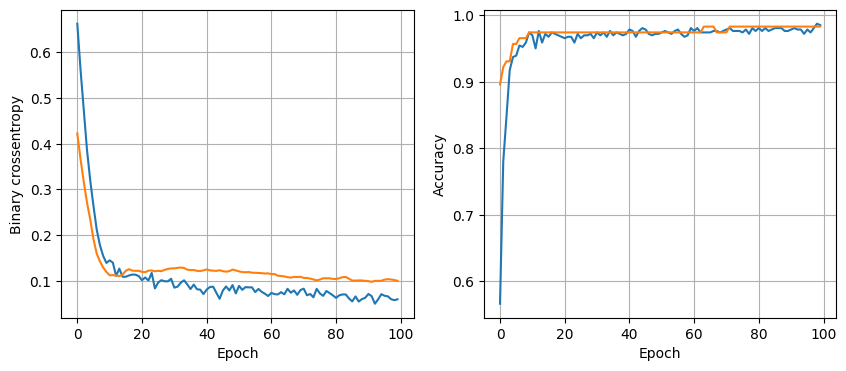

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9699 - loss: 0.1127 
16 nodes, dropout 0.2, lr 0.001, batch size 64


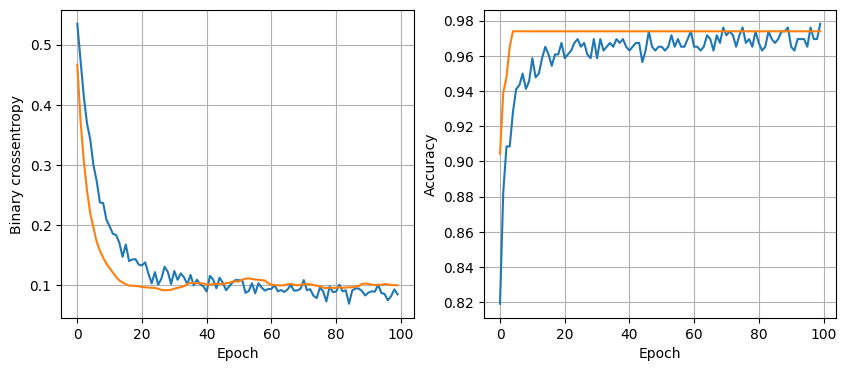

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9705 - loss: 0.0842 
16 nodes, dropout 0.2, lr 0.001, batch size 128


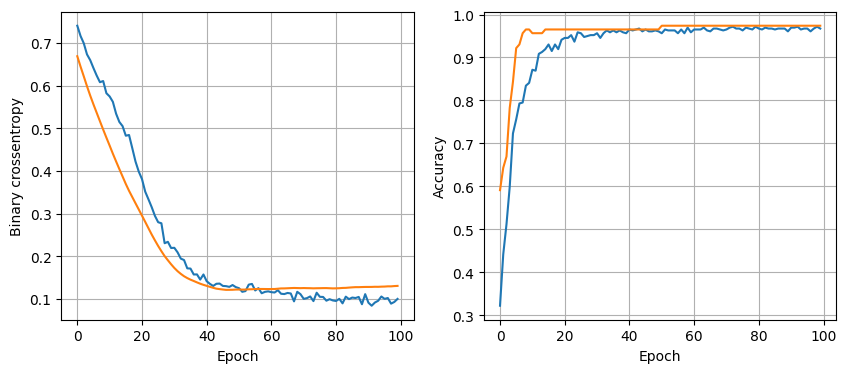

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9621 - loss: 0.0918 
32 nodes, dropout 0, lr 0.01, batch size 32


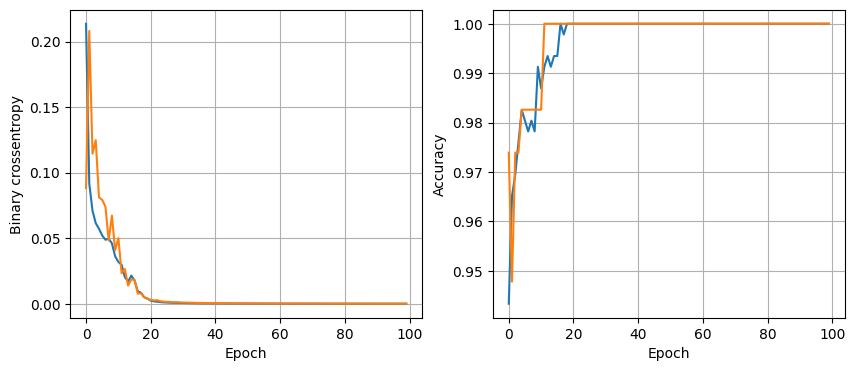

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9120 - loss: 0.5653 
32 nodes, dropout 0, lr 0.01, batch size 64


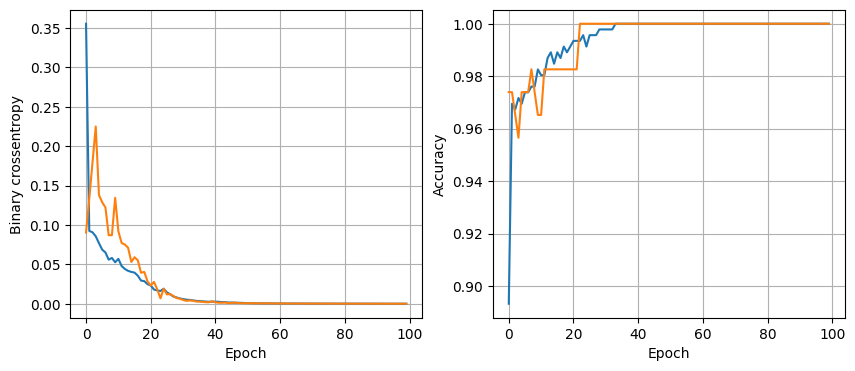

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9326 - loss: 0.5033 
32 nodes, dropout 0, lr 0.01, batch size 128


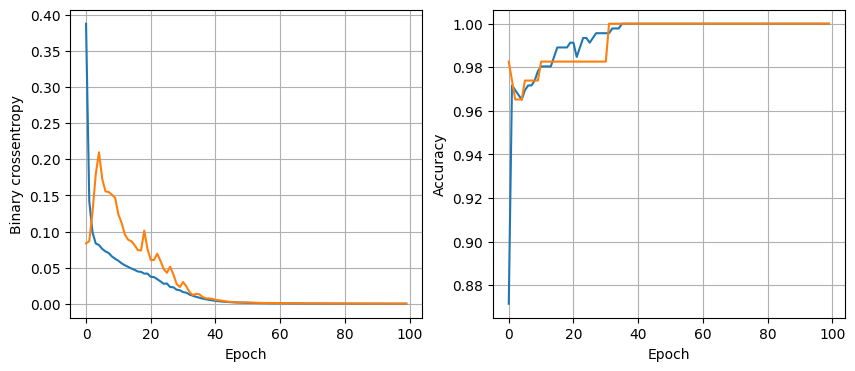

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9157 - loss: 0.3872 
32 nodes, dropout 0, lr 0.005, batch size 32


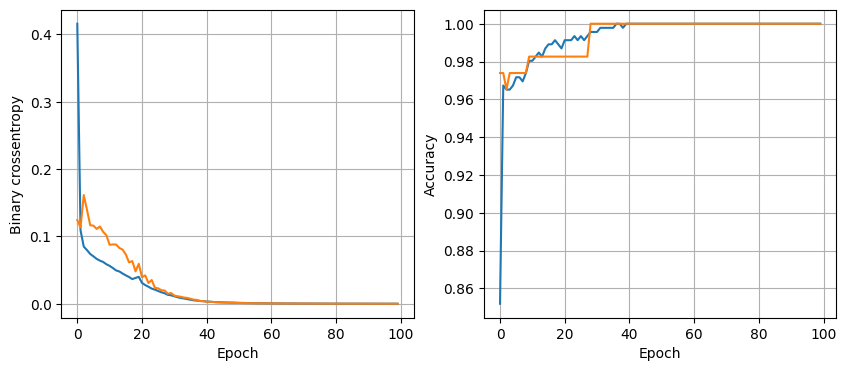

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9397 - loss: 0.3832 
32 nodes, dropout 0, lr 0.005, batch size 64


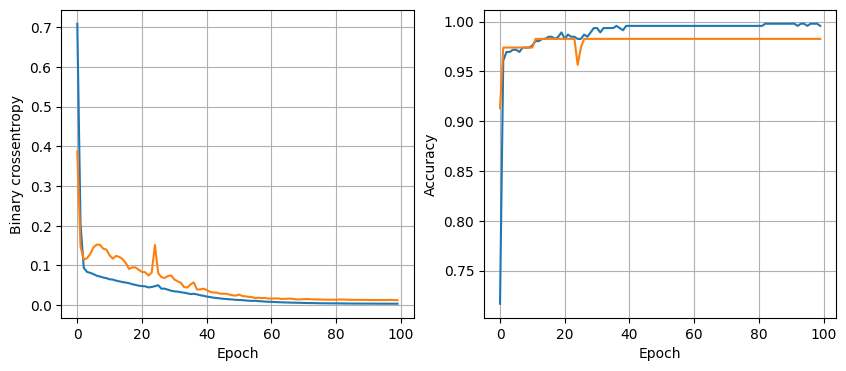

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9343 - loss: 0.3250 
32 nodes, dropout 0, lr 0.005, batch size 128


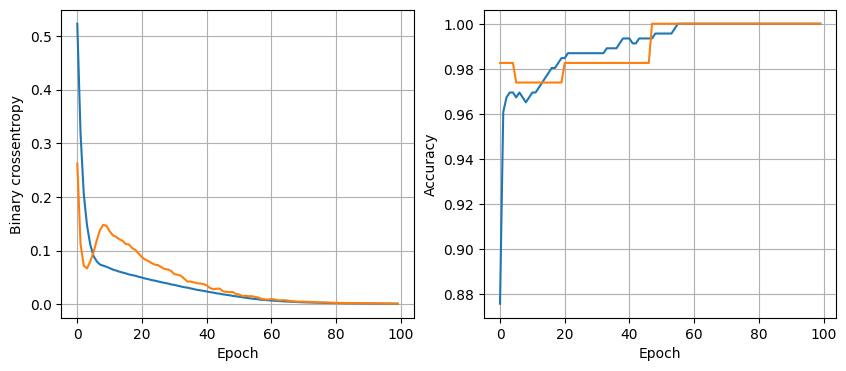

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9350 - loss: 0.2928 
32 nodes, dropout 0, lr 0.001, batch size 32


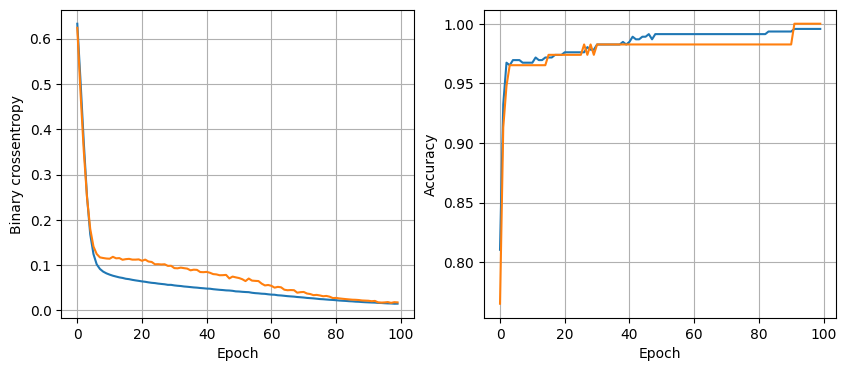

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9404 - loss: 0.1635 
32 nodes, dropout 0, lr 0.001, batch size 64


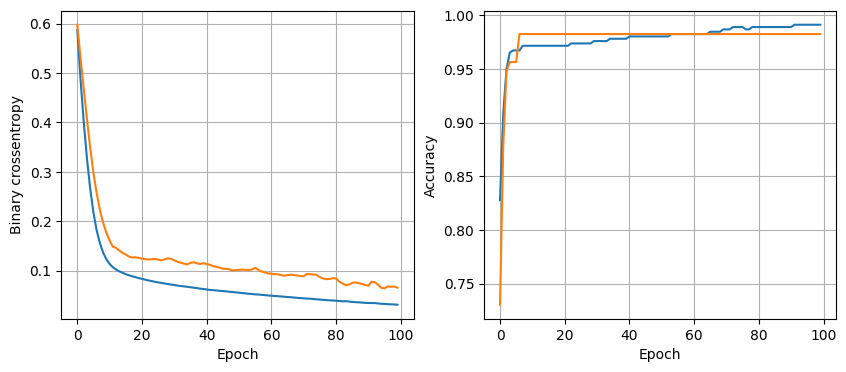

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9512 - loss: 0.1296 
32 nodes, dropout 0, lr 0.001, batch size 128


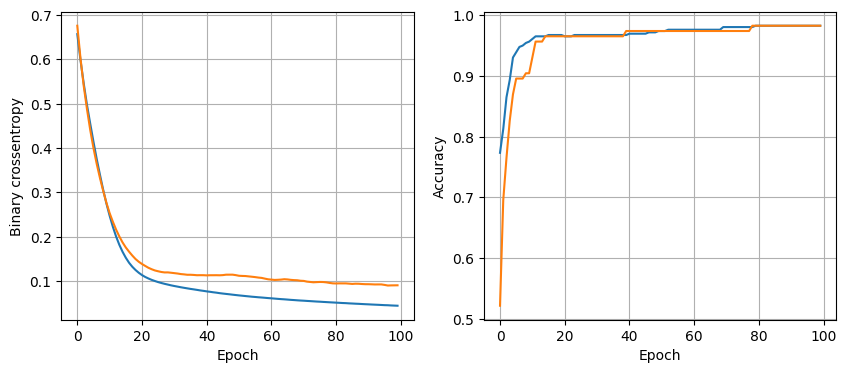

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9699 - loss: 0.1119 
32 nodes, dropout 0.2, lr 0.01, batch size 32


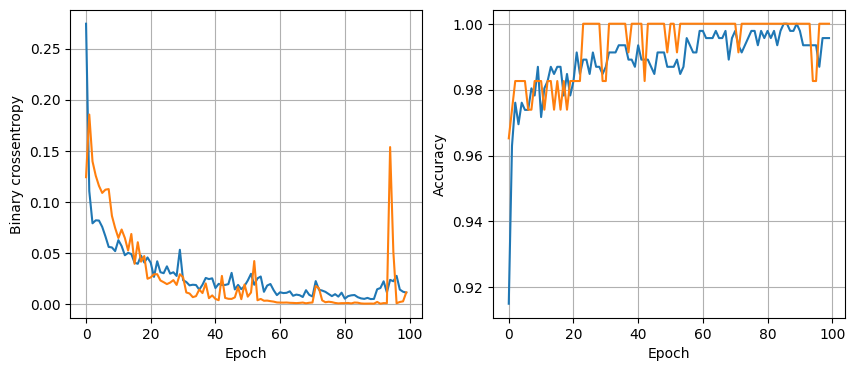

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9193 - loss: 0.5897 
32 nodes, dropout 0.2, lr 0.01, batch size 64


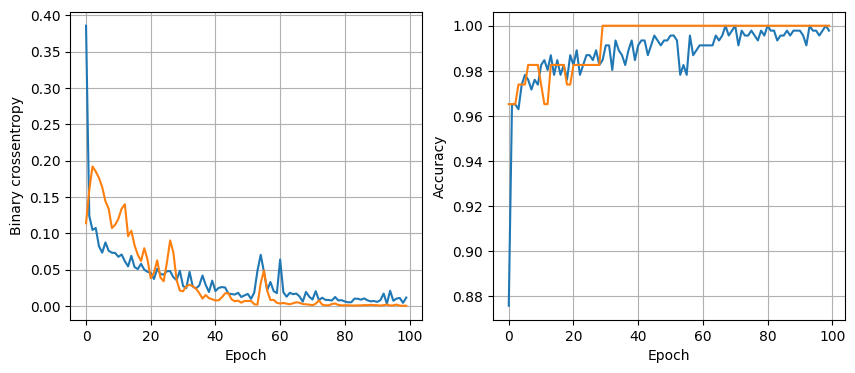

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9284 - loss: 0.3504 
32 nodes, dropout 0.2, lr 0.01, batch size 128


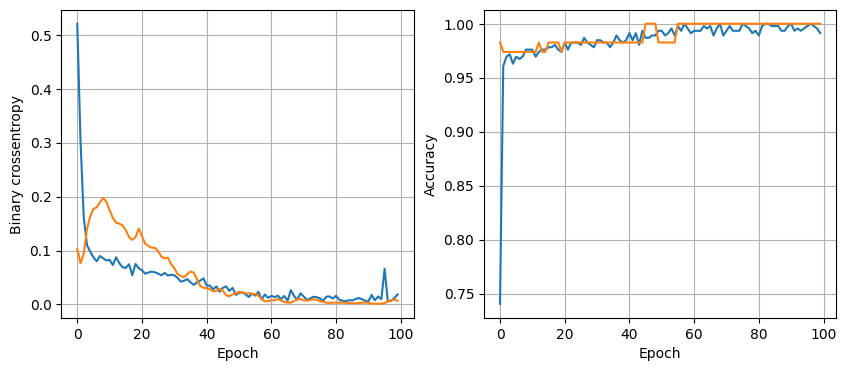

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9512 - loss: 0.2651 
32 nodes, dropout 0.2, lr 0.005, batch size 32


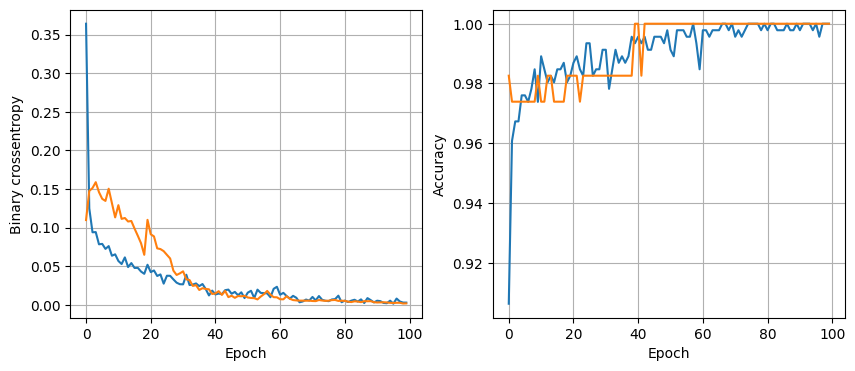

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9519 - loss: 0.4217 
32 nodes, dropout 0.2, lr 0.005, batch size 64


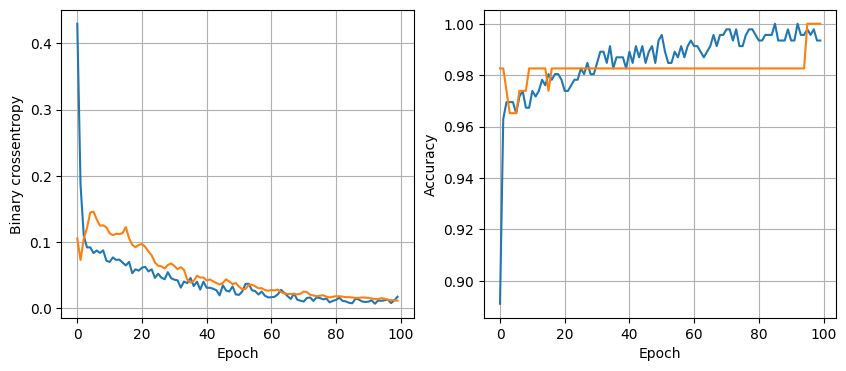

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9380 - loss: 0.3269 
32 nodes, dropout 0.2, lr 0.005, batch size 128


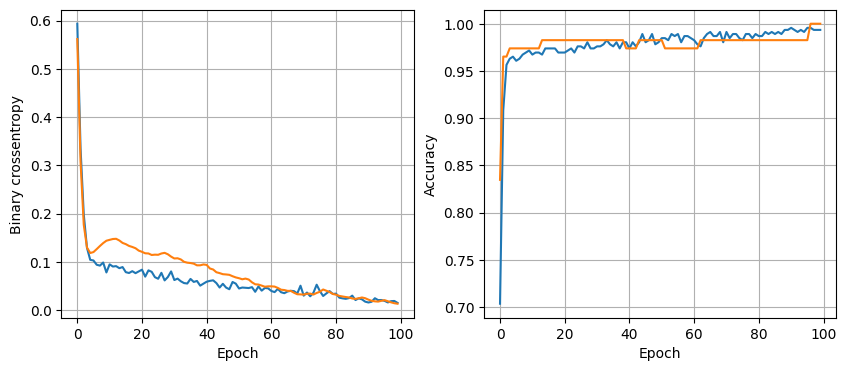

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9441 - loss: 0.1985 
32 nodes, dropout 0.2, lr 0.001, batch size 32


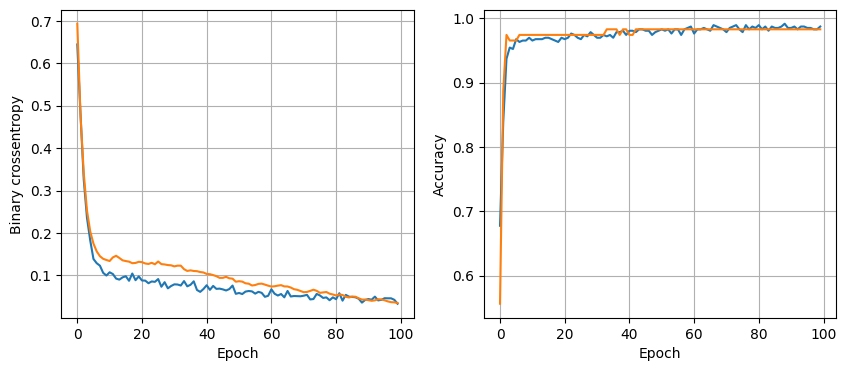

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9573 - loss: 0.1191 
32 nodes, dropout 0.2, lr 0.001, batch size 64


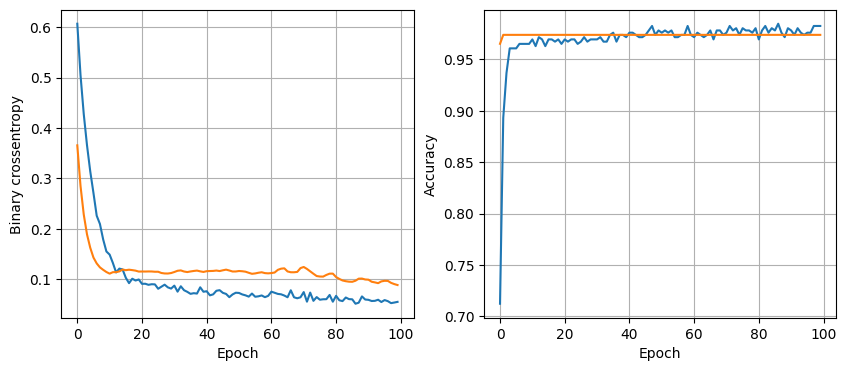

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9645 - loss: 0.1014 
32 nodes, dropout 0.2, lr 0.001, batch size 128


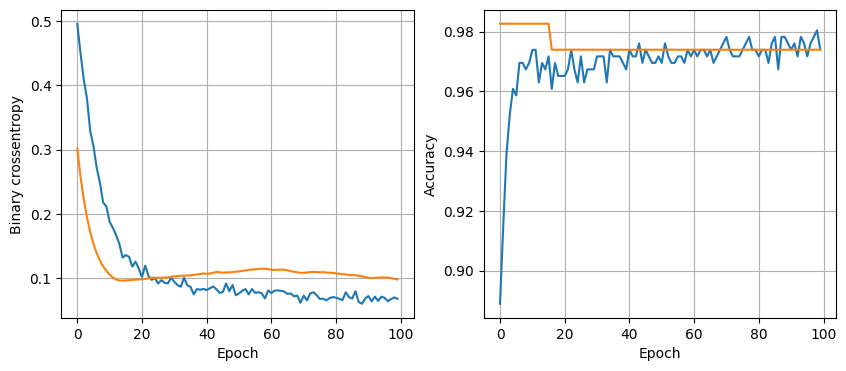

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9777 - loss: 0.0999 
64 nodes, dropout 0, lr 0.01, batch size 32


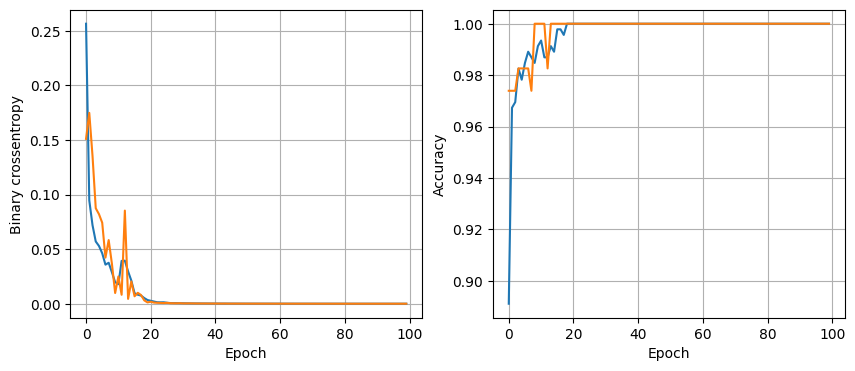

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9337 - loss: 0.5345 
64 nodes, dropout 0, lr 0.01, batch size 64


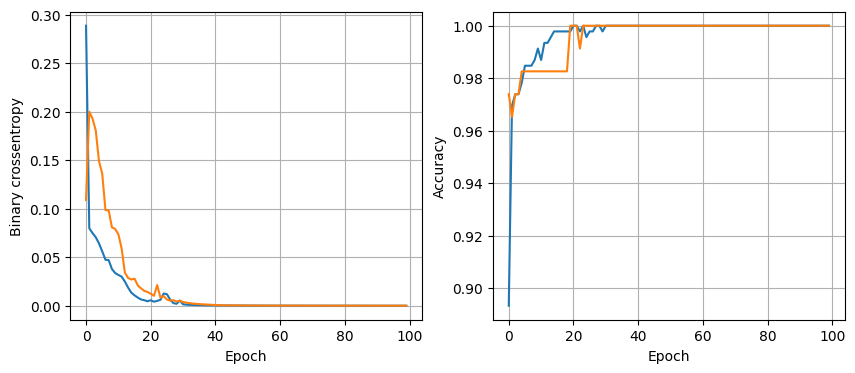

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9157 - loss: 0.5478 
64 nodes, dropout 0, lr 0.01, batch size 128


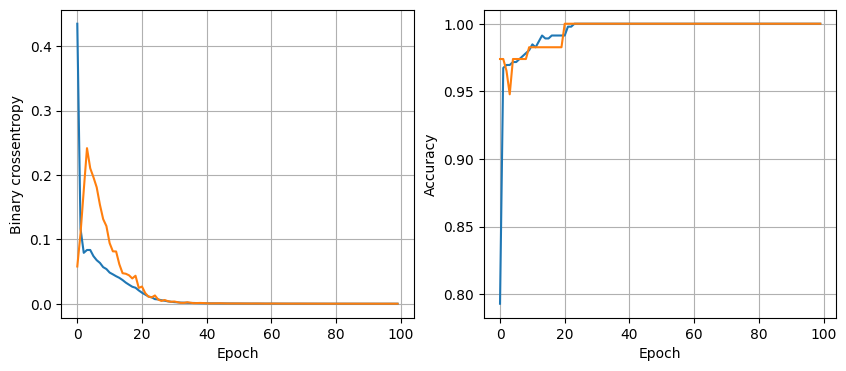

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.4907 
64 nodes, dropout 0, lr 0.005, batch size 32


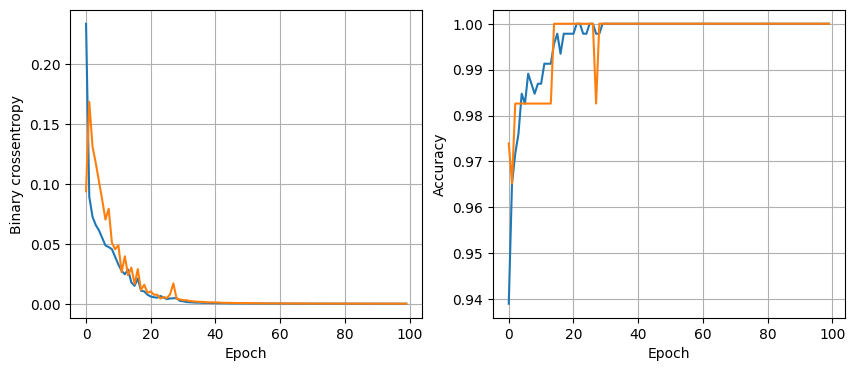

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9523 - loss: 0.4255 
64 nodes, dropout 0, lr 0.005, batch size 64


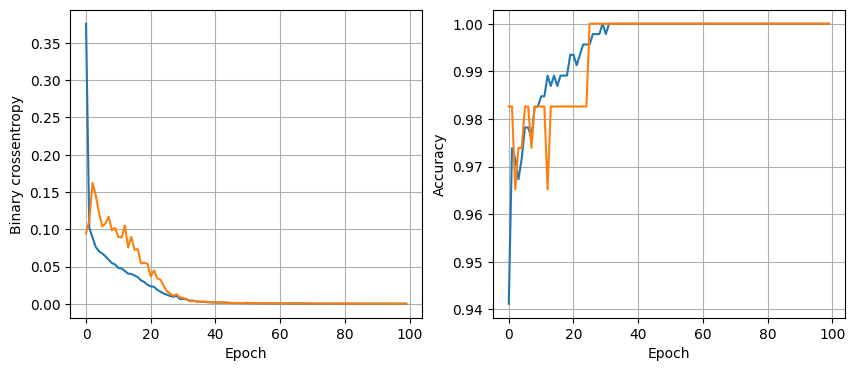

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9246 - loss: 0.4723 
64 nodes, dropout 0, lr 0.005, batch size 128


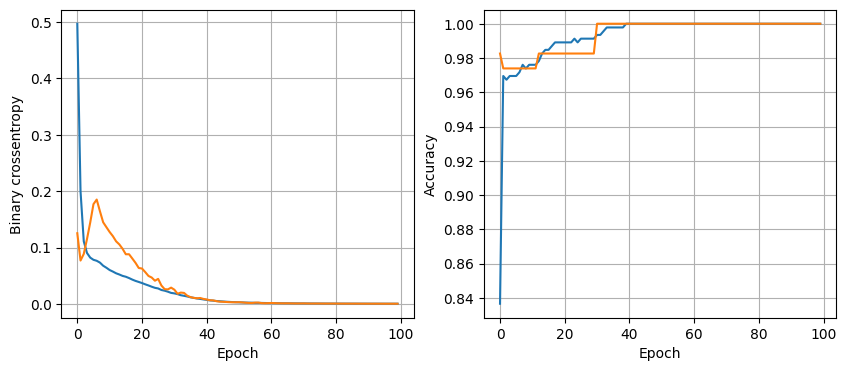

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9131 - loss: 0.4023 
64 nodes, dropout 0, lr 0.001, batch size 32


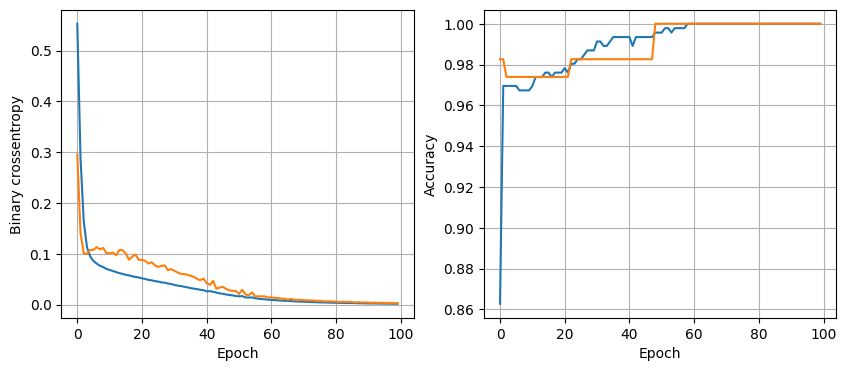

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9326 - loss: 0.2818 
64 nodes, dropout 0, lr 0.001, batch size 64


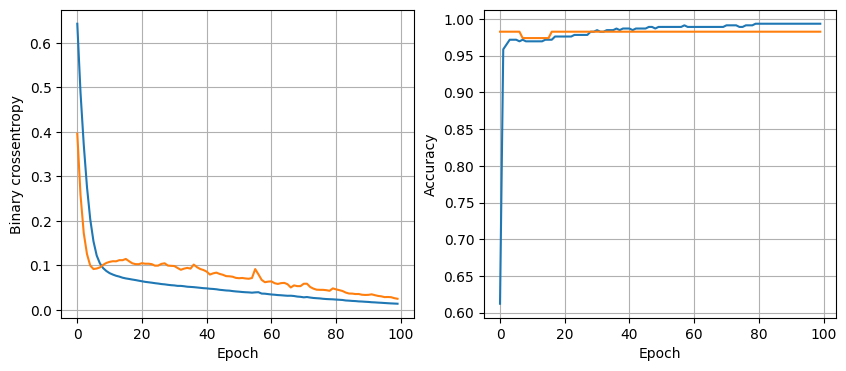

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9458 - loss: 0.1430 
64 nodes, dropout 0, lr 0.001, batch size 128


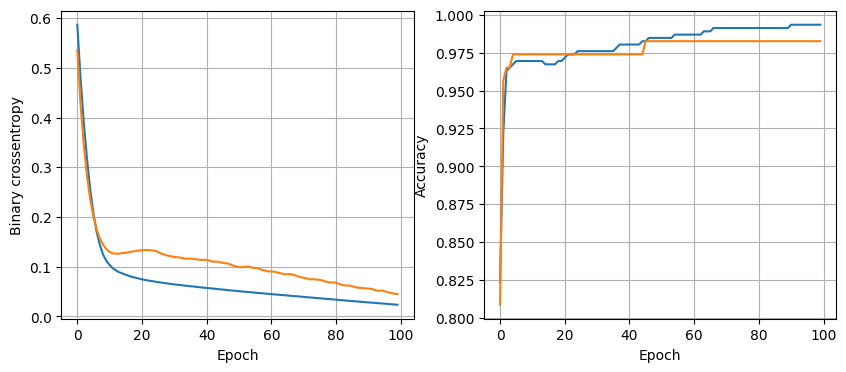

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9566 - loss: 0.1392 
64 nodes, dropout 0.2, lr 0.01, batch size 32


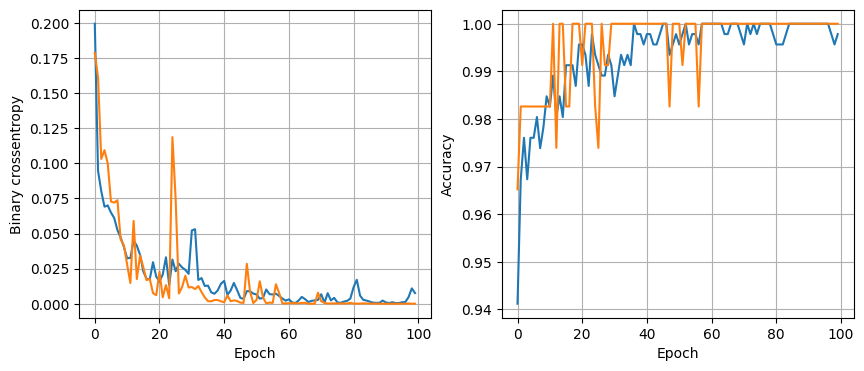

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9254 - loss: 0.8141 
64 nodes, dropout 0.2, lr 0.01, batch size 64


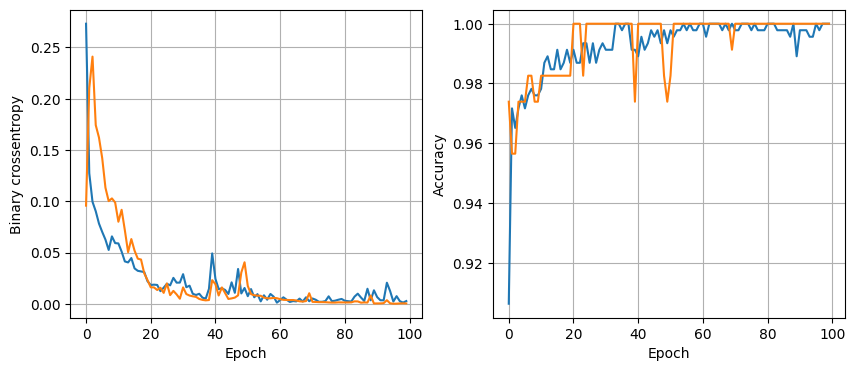

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9573 - loss: 0.4963 
64 nodes, dropout 0.2, lr 0.01, batch size 128


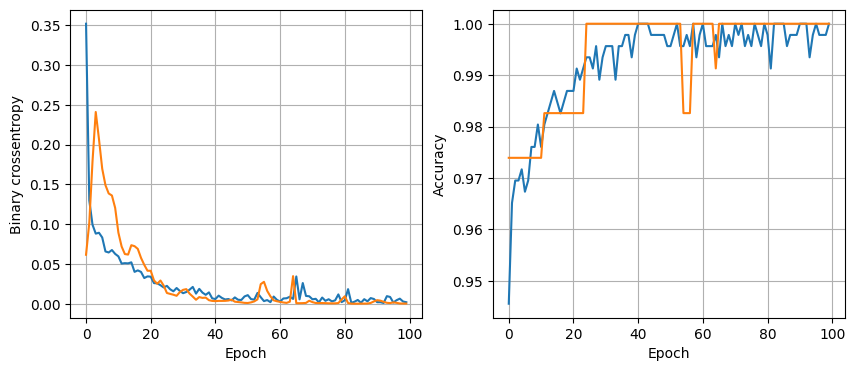

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9627 - loss: 0.4173 
64 nodes, dropout 0.2, lr 0.005, batch size 32


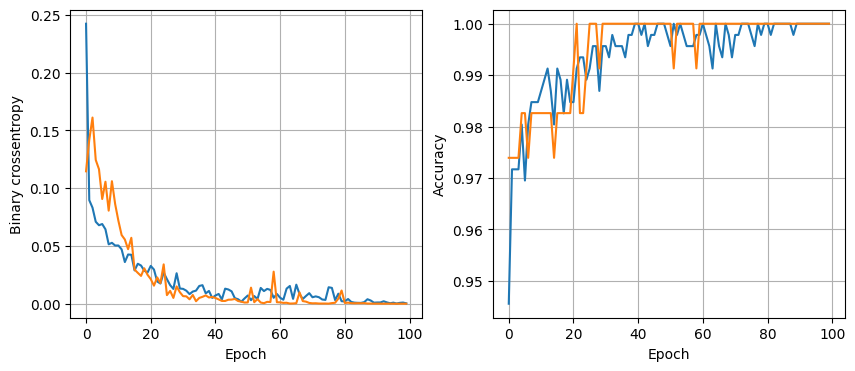

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9573 - loss: 0.4467 
64 nodes, dropout 0.2, lr 0.005, batch size 64


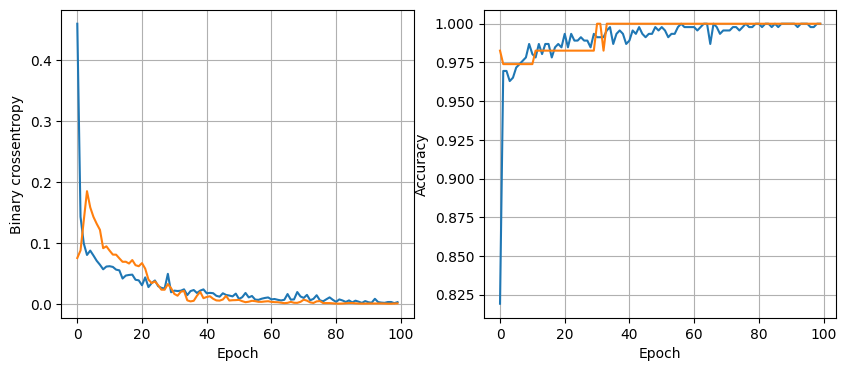

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9499 - loss: 0.4734 
64 nodes, dropout 0.2, lr 0.005, batch size 128


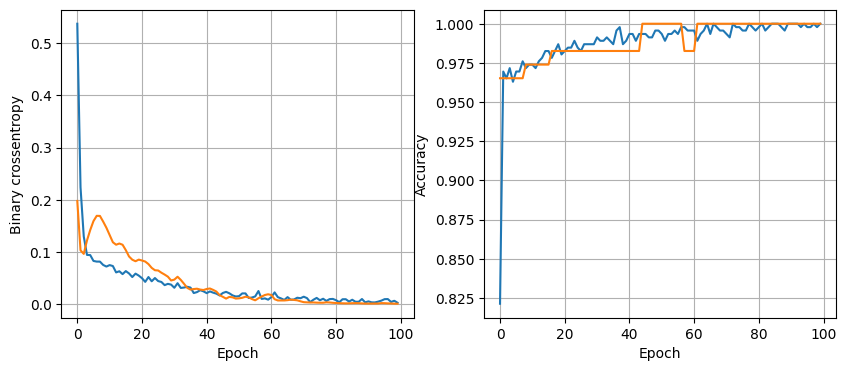

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9536 - loss: 0.2862 
64 nodes, dropout 0.2, lr 0.001, batch size 32


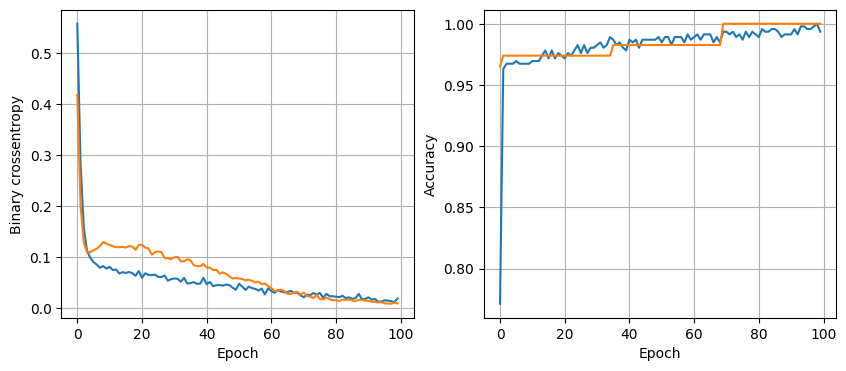

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9549 - loss: 0.2063 
64 nodes, dropout 0.2, lr 0.001, batch size 64


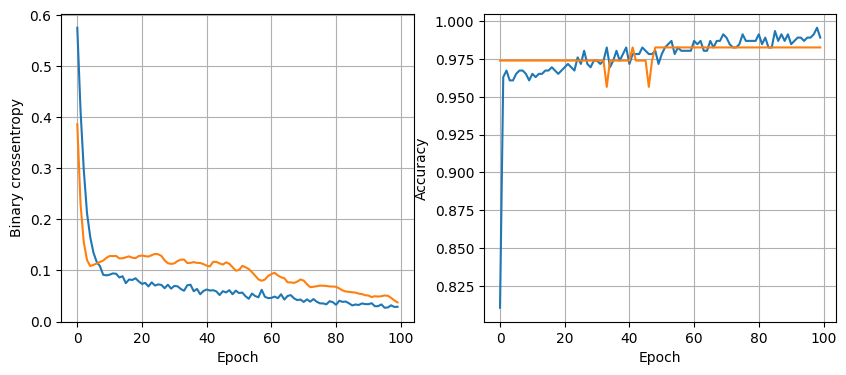

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9547 - loss: 0.1469 
64 nodes, dropout 0.2, lr 0.001, batch size 128


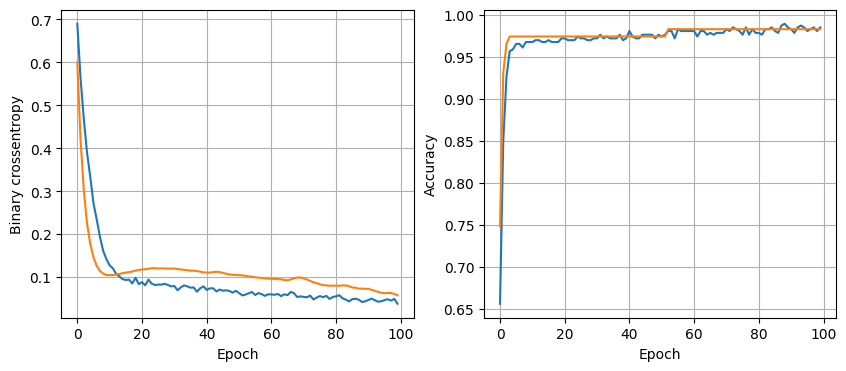

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9590 - loss: 0.1019 


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.90      0.95        60

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

